In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### Problem statement: To build a model to help predict the sale price of properties in Ames city

In [2]:
file=open("Ames_Housing_Feature_Description.txt","r")
print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
data=pd.read_csv("Ames_Housing_Data.csv")
data

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0     526301100           20        RL         141.0     31770   Pave   NaN   
1     526350040           20        RH          80.0     11622   Pave   NaN   
2     526351010           20        RL          81.0     14267   Pave   NaN   
3     526353030           20        RL          93.0     11160   Pave   NaN   
4     527105010           60        RL          74.0     13830   Pave   NaN   
...         ...          ...       ...           ...       ...    ...   ...   
2925  923275080           80        RL          37.0      7937   Pave   NaN   
2926  923276100           20        RL           NaN      8885   Pave   NaN   
2927  923400125           85        RL          62.0     10441   Pave   NaN   
2928  924100070           20        RL          77.0     10010   Pave   NaN   
2929  924151050           60        RL          74.0      9627   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
0          IR1          Lvl    AllPub  ...         0     NaN    NaN   
1          Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2          IR1          Lvl    AllPub  ...         0     NaN    NaN   
3          Reg          Lvl    AllPub  ...         0     NaN    NaN   
4          IR1          Lvl    AllPub  ...         0     NaN  MnPrv   
...        ...          ...       ...  ...       ...     ...    ...   
2925       IR1          Lvl    AllPub  ...         0     NaN  GdPrv   
2926       IR1          Low    AllPub  ...         0     NaN  MnPrv   
2927       Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2928       Reg          Lvl    AllPub  ...         0     NaN    NaN   
2929       Reg          Lvl    AllPub  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
0             NaN        0       5    2010        WD           Normal   
1             NaN        0       6    2010        WD           Normal   
2            Gar2    12500       6    2010        WD           Normal   
3             NaN        0       4    2010        WD           Normal   
4             NaN        0       3    2010        WD           Normal   
...           ...      ...     ...     ...        ...             ...   
2925          NaN        0       3    2006        WD           Normal   
2926          NaN        0       6    2006        WD           Normal   
2927         Shed      700       7    2006        WD           Normal   
2928          NaN        0       4    2006        WD           Normal   
2929          NaN        0      11    2006        WD           Normal   

      SalePrice  
0        215000  
1        105000  
2        172000  
3        244000  
4        189900  
...         ...  
2925     142500  
2926     131000  
2927     132000  
2928     170000  
2929     188000  

[2930 rows x 81 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

## EDA, cleaning and visualizations

In [5]:
cols_with_na=data[data.columns[data.isna().any()]].isna().sum()
cols_with_na[cols_with_na.values<50]

Mas Vnr Type      23
Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Electrical         1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64

In [6]:
data=data.dropna(subset=['Mas Vnr Type', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Garage Cars', 'Garage Area'])

In [7]:
data[data.columns[data.isna().any()]].isna().sum()

Lot Frontage       484
Alley             2707
Bsmt Qual           78
Bsmt Cond           78
Bsmt Exposure       81
BsmtFin Type 1      78
BsmtFin Type 2      79
Fireplace Qu      1410
Garage Type        156
Garage Yr Blt      157
Garage Finish      157
Garage Qual        157
Garage Cond        157
Pool QC           2890
Fence             2333
Misc Feature      2797
dtype: int64

In [8]:
basement_cols=['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2']
data[basement_cols]=data[basement_cols].fillna("None")

C:\Users\Emil.Javadli\AppData\Local\Temp\ipykernel_23888\1684555551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[basement_cols]=data[basement_cols].fillna("None")


In [9]:
garage_cols=['Garage Type','Garage Finish', 'Garage Qual', 'Garage Cond']
data[garage_cols]=data[garage_cols].fillna("None")

C:\Users\Emil.Javadli\AppData\Local\Temp\ipykernel_23888\2501351808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[garage_cols]=data[garage_cols].fillna("None")


In [10]:
data[data.columns[data.isna().any()]].isna().sum()

Lot Frontage      484
Alley            2707
Fireplace Qu     1410
Garage Yr Blt     157
Pool QC          2890
Fence            2333
Misc Feature     2797
dtype: int64

In [11]:
data['Fireplace Qu']=data['Fireplace Qu'].fillna("None")
data=data.drop(['Alley','Pool QC','Fence', 'Misc Feature'],axis=1)

C:\Users\Emil.Javadli\AppData\Local\Temp\ipykernel_23888\2622714837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fireplace Qu']=data['Fireplace Qu'].fillna("None")


In [12]:
data[data.columns[data.isna().any()]].isna().sum()

Lot Frontage     484
Garage Yr Blt    157
dtype: int64

In [13]:
data["Lot Frontage"]=data.groupby("Condition 1")["Lot Frontage"].transform(lambda x: x.fillna(x.mean()))
data["Garage Yr Blt"]=data["Garage Yr Blt"].fillna(0)

In [14]:
data[data.columns[data.isna().any()]].isna().sum()

Series([], dtype: float64)

In [15]:
data.PID.duplicated().sum()

0

## Data Cleaning: visualization and dealing with outliers

In [16]:
data["MS SubClass"]=data["MS SubClass"].astype(str)
data=data.drop("PID", axis=1)

In [17]:
data.shape

(2903, 76)

In [18]:
corr_with_price=np.abs(data.corr()["SalePrice"]).sort_values(ascending=False)
corr_with_price.head(10)

SalePrice         1.000000
Overall Qual      0.799121
Gr Liv Area       0.708248
Garage Cars       0.647001
Garage Area       0.639161
Total Bsmt SF     0.634647
1st Flr SF        0.625499
Year Built        0.558468
Full Bath         0.546100
Year Remod/Add    0.532265
Name: SalePrice, dtype: float64

In [19]:
biggest_corr=['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF',
       'Garage Cars', 'Garage Area', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Mas Vnr Area', 'TotRms AbvGrd', 'Fireplaces',
       'BsmtFin SF 1', 'Lot Frontage', 'Wood Deck SF', 'Open Porch SF',
       'Half Bath', 'Bsmt Full Bath', '2nd Flr SF', 'Lot Area',
       'Garage Yr Blt']

### Overall quality

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

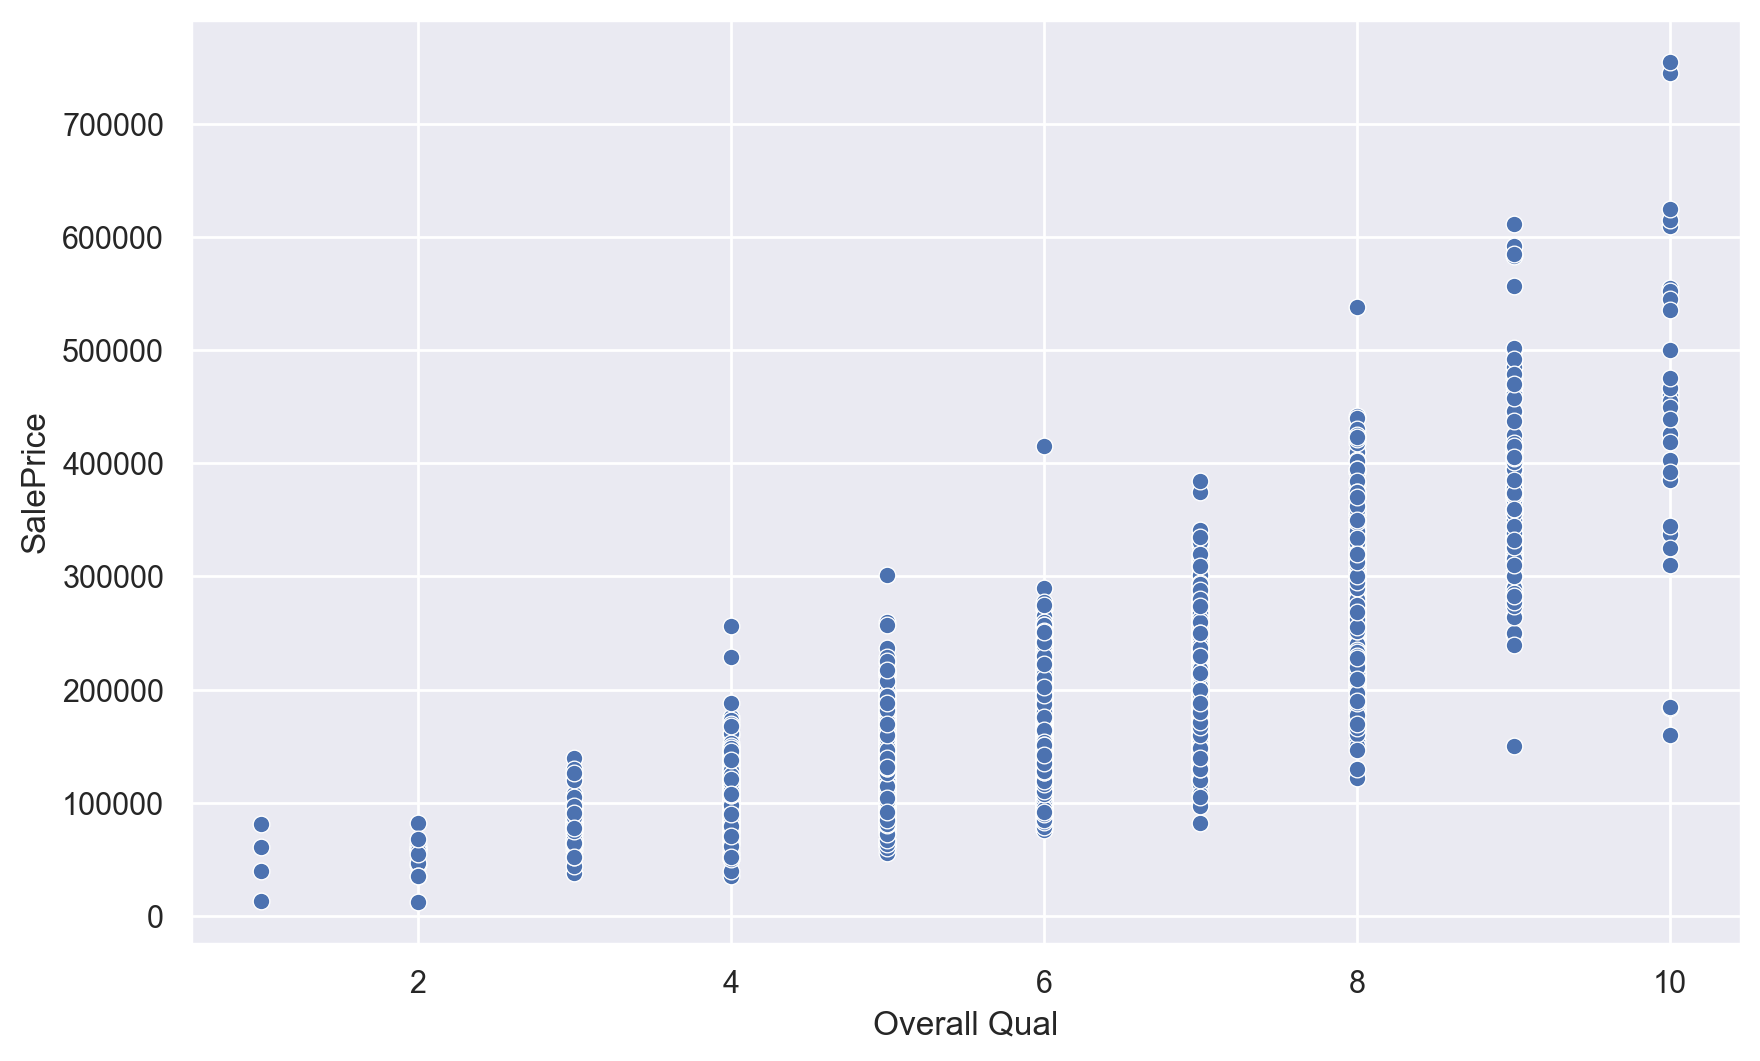

In [20]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data['Overall Qual'], y=data["SalePrice"])

<Axes: xlabel='Overall Qual', ylabel='Count'>

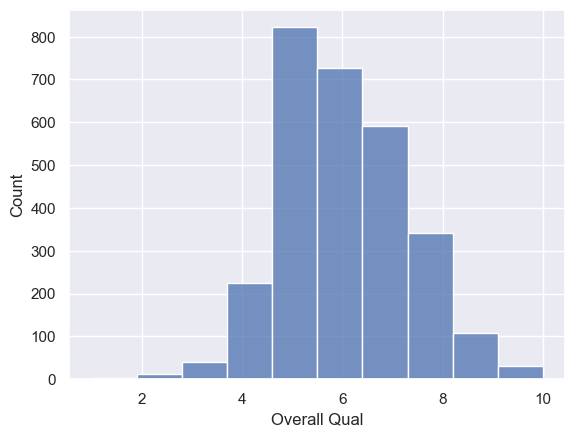

In [21]:
sns.histplot(data['Overall Qual'], bins=10)

### Gr Liv Area

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

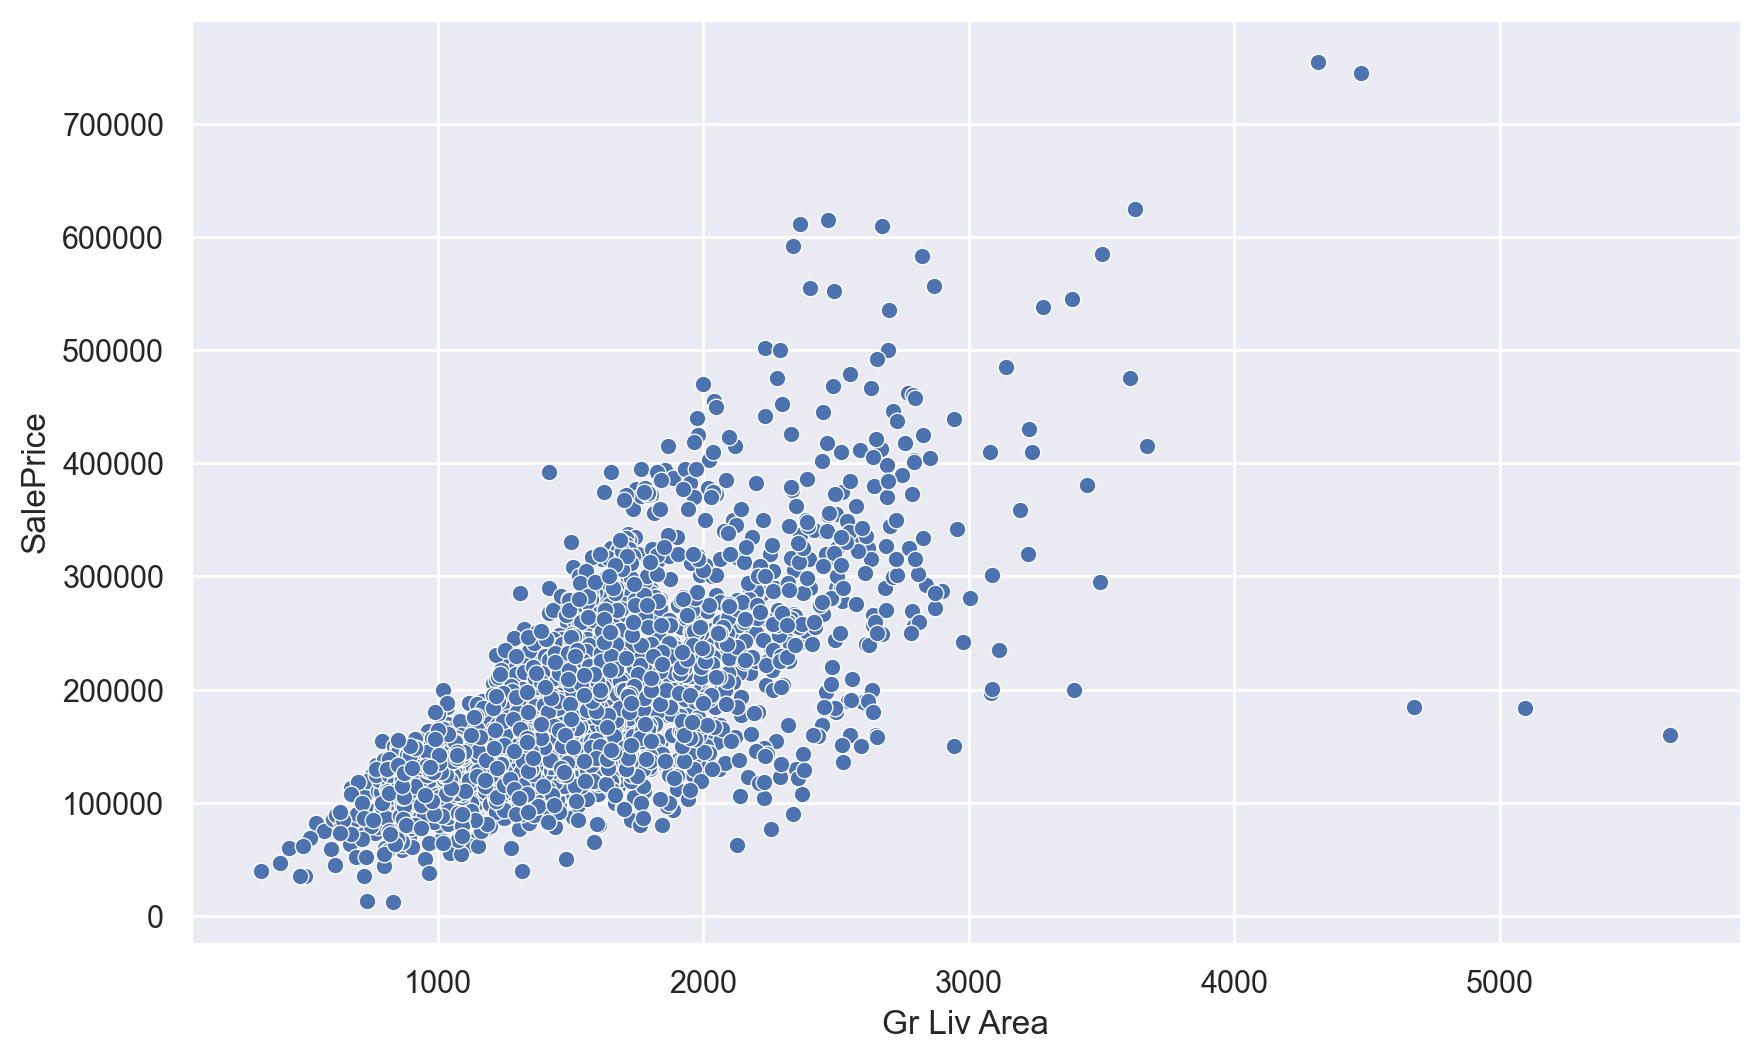

In [22]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data['Gr Liv Area'], y=data["SalePrice"])

In [23]:
data['Gr Liv Area'].describe()

count    2903.000000
mean     1497.739924
std       504.641233
min       334.000000
25%      1124.000000
50%      1440.000000
75%      1740.000000
max      5642.000000
Name: Gr Liv Area, dtype: float64

<Axes: xlabel='Gr Liv Area', ylabel='Count'>

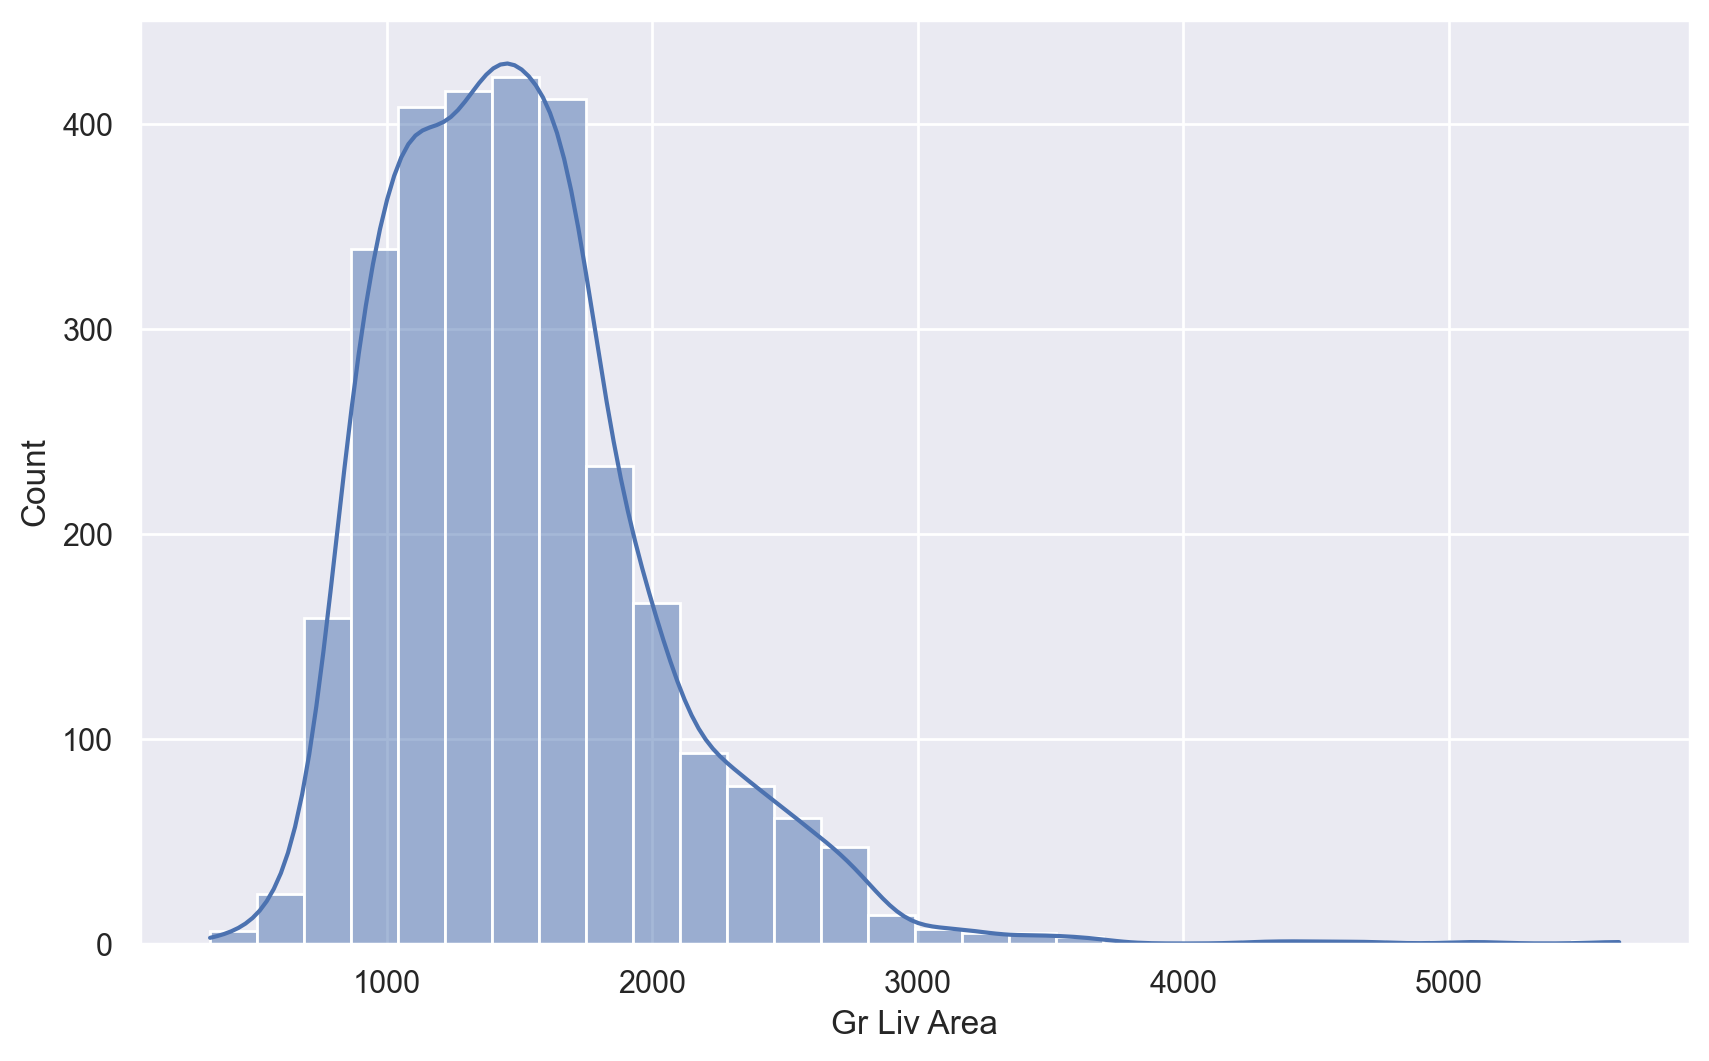

In [24]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(data['Gr Liv Area'], bins=30, kde=True)

### Total Bsmt SF

In [25]:
data["Total Bsmt SF"].describe()

count    2903.000000
mean     1051.116087
std       440.203132
min         0.000000
25%       792.500000
50%       990.000000
75%      1300.000000
max      6110.000000
Name: Total Bsmt SF, dtype: float64

<Axes: xlabel='Total Bsmt SF', ylabel='Count'>

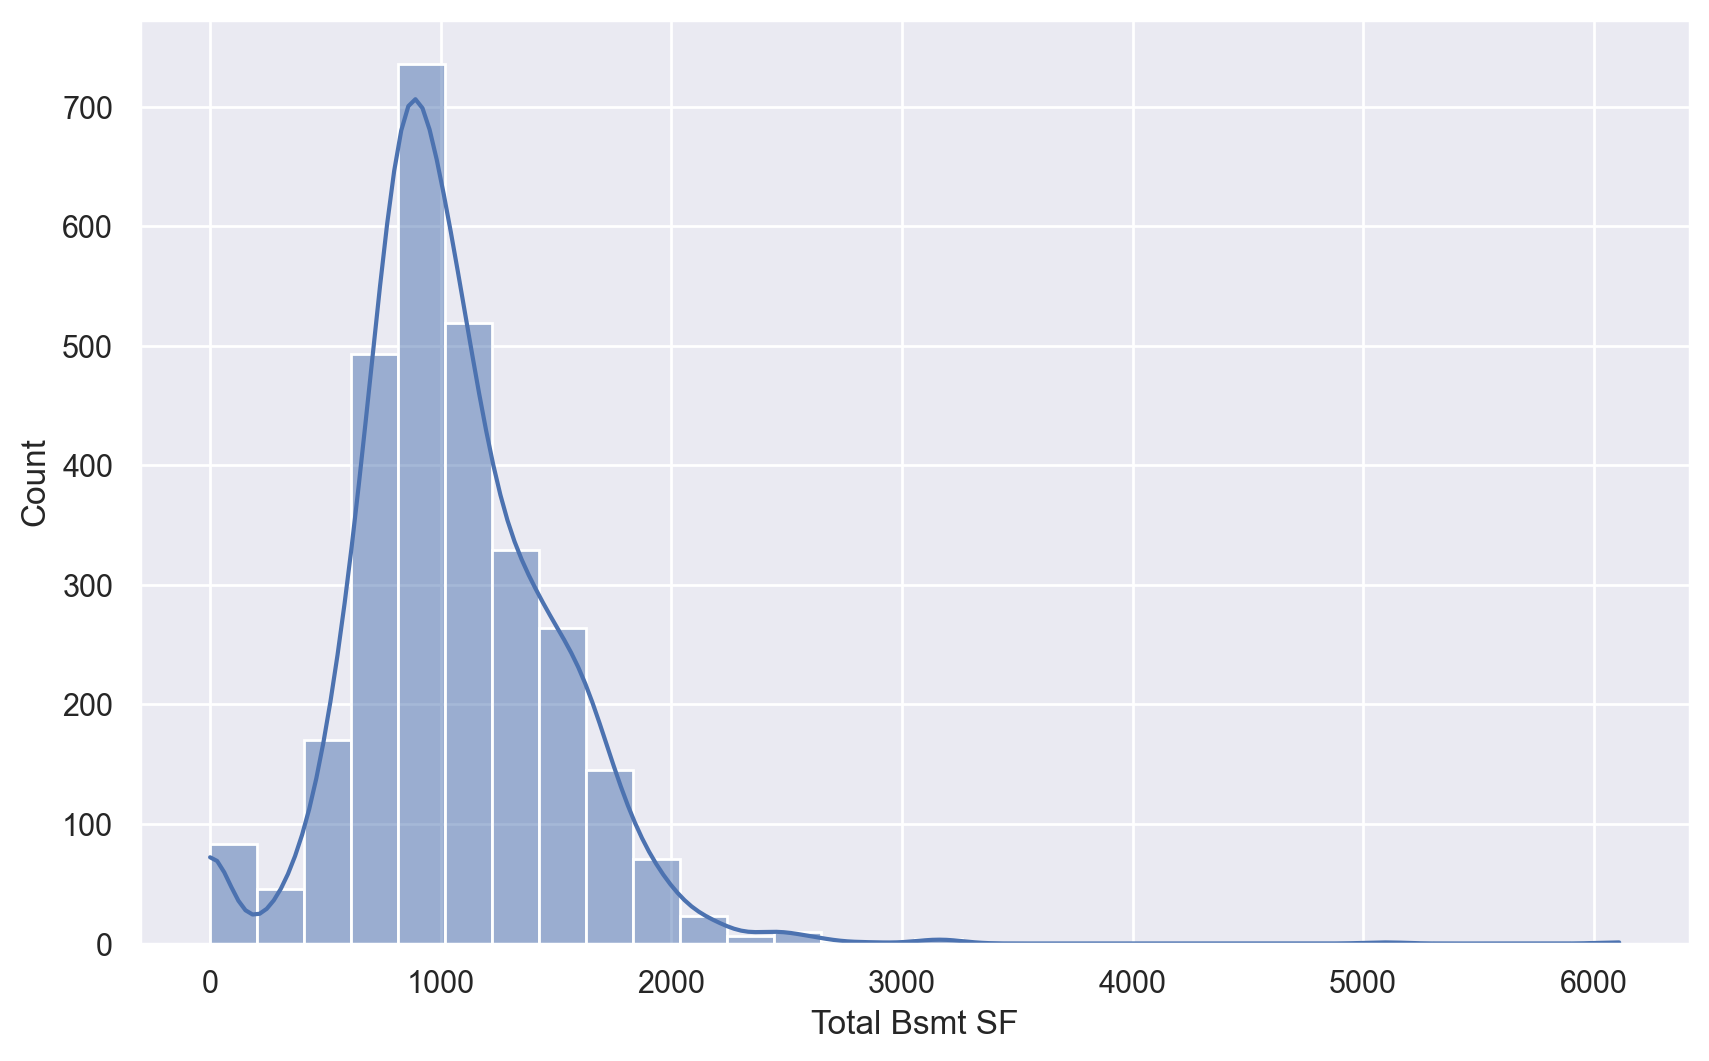

In [26]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(data['Total Bsmt SF'], bins=30, kde=True)

<Axes: xlabel='Total Bsmt SF', ylabel='SalePrice'>

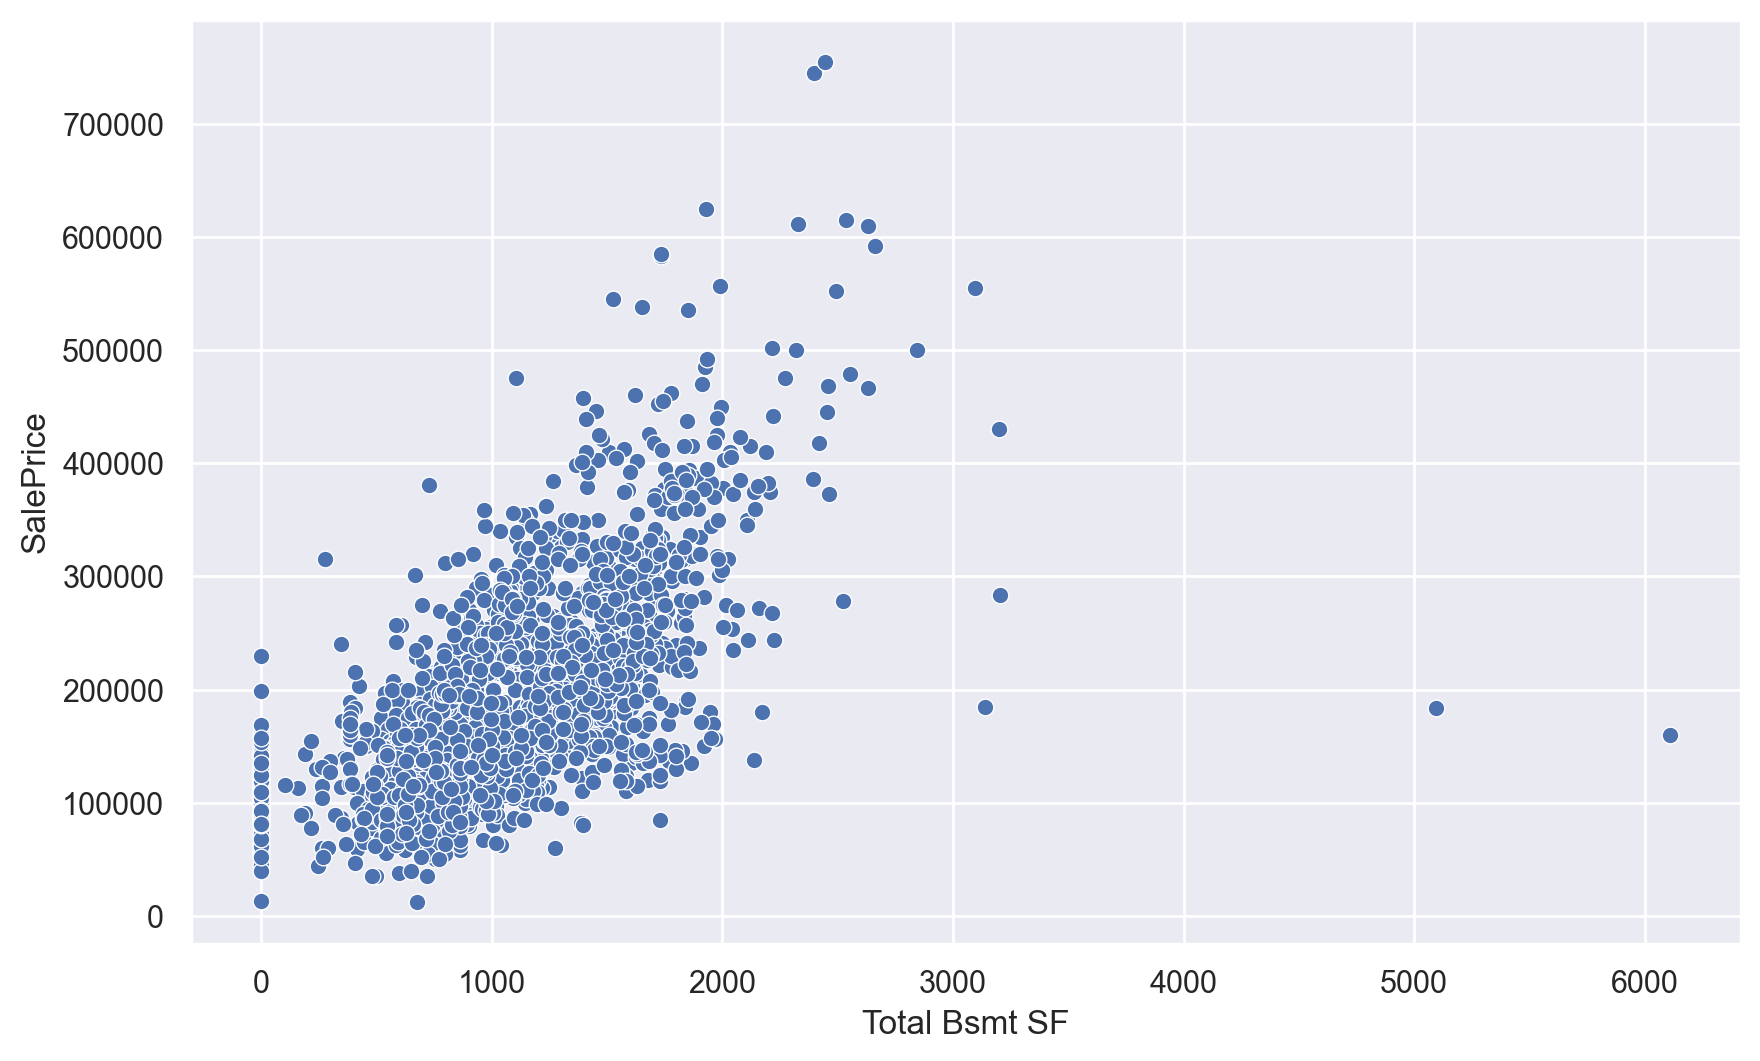

In [27]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data['Total Bsmt SF'], y=data["SalePrice"])

### Garage Area

In [28]:
data["Garage Area" ].describe()

count    2903.000000
mean      472.314158
std       215.277597
min         0.000000
25%       319.500000
50%       479.000000
75%       576.000000
max      1488.000000
Name: Garage Area, dtype: float64

<Axes: xlabel='Garage Area', ylabel='Count'>

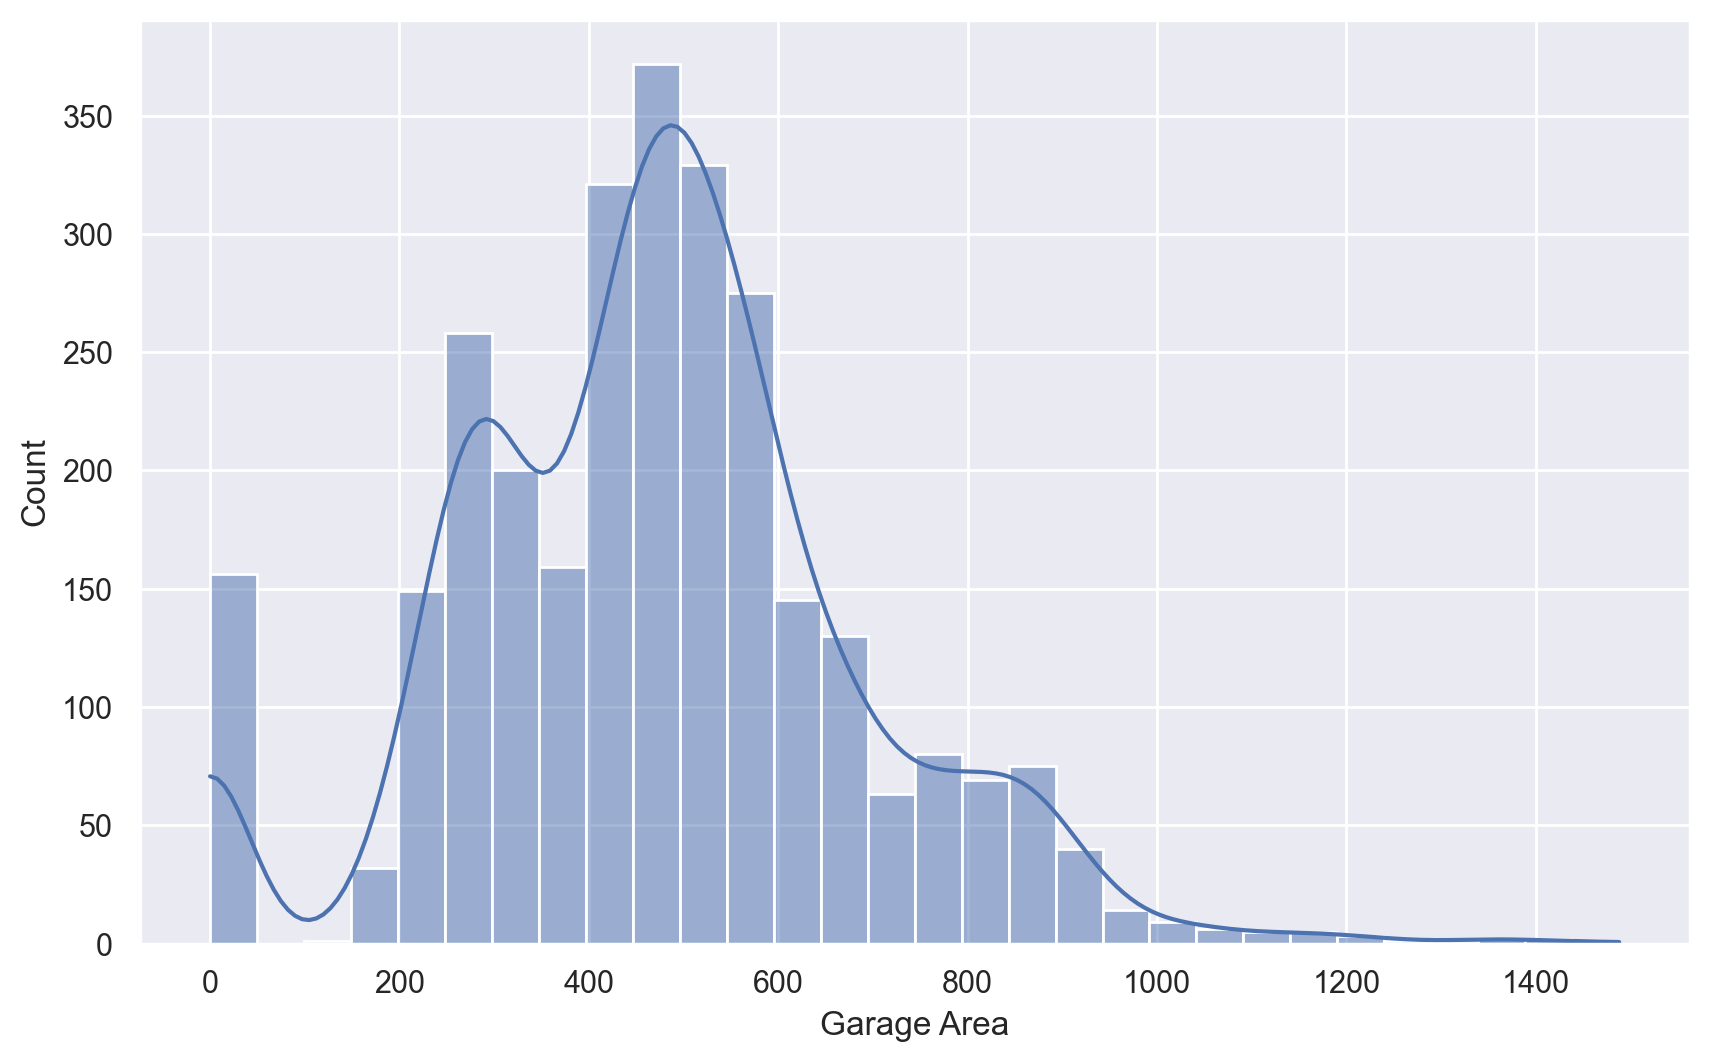

In [29]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(data["Garage Area"], bins=30, kde=True)

<Axes: xlabel='Garage Area', ylabel='SalePrice'>

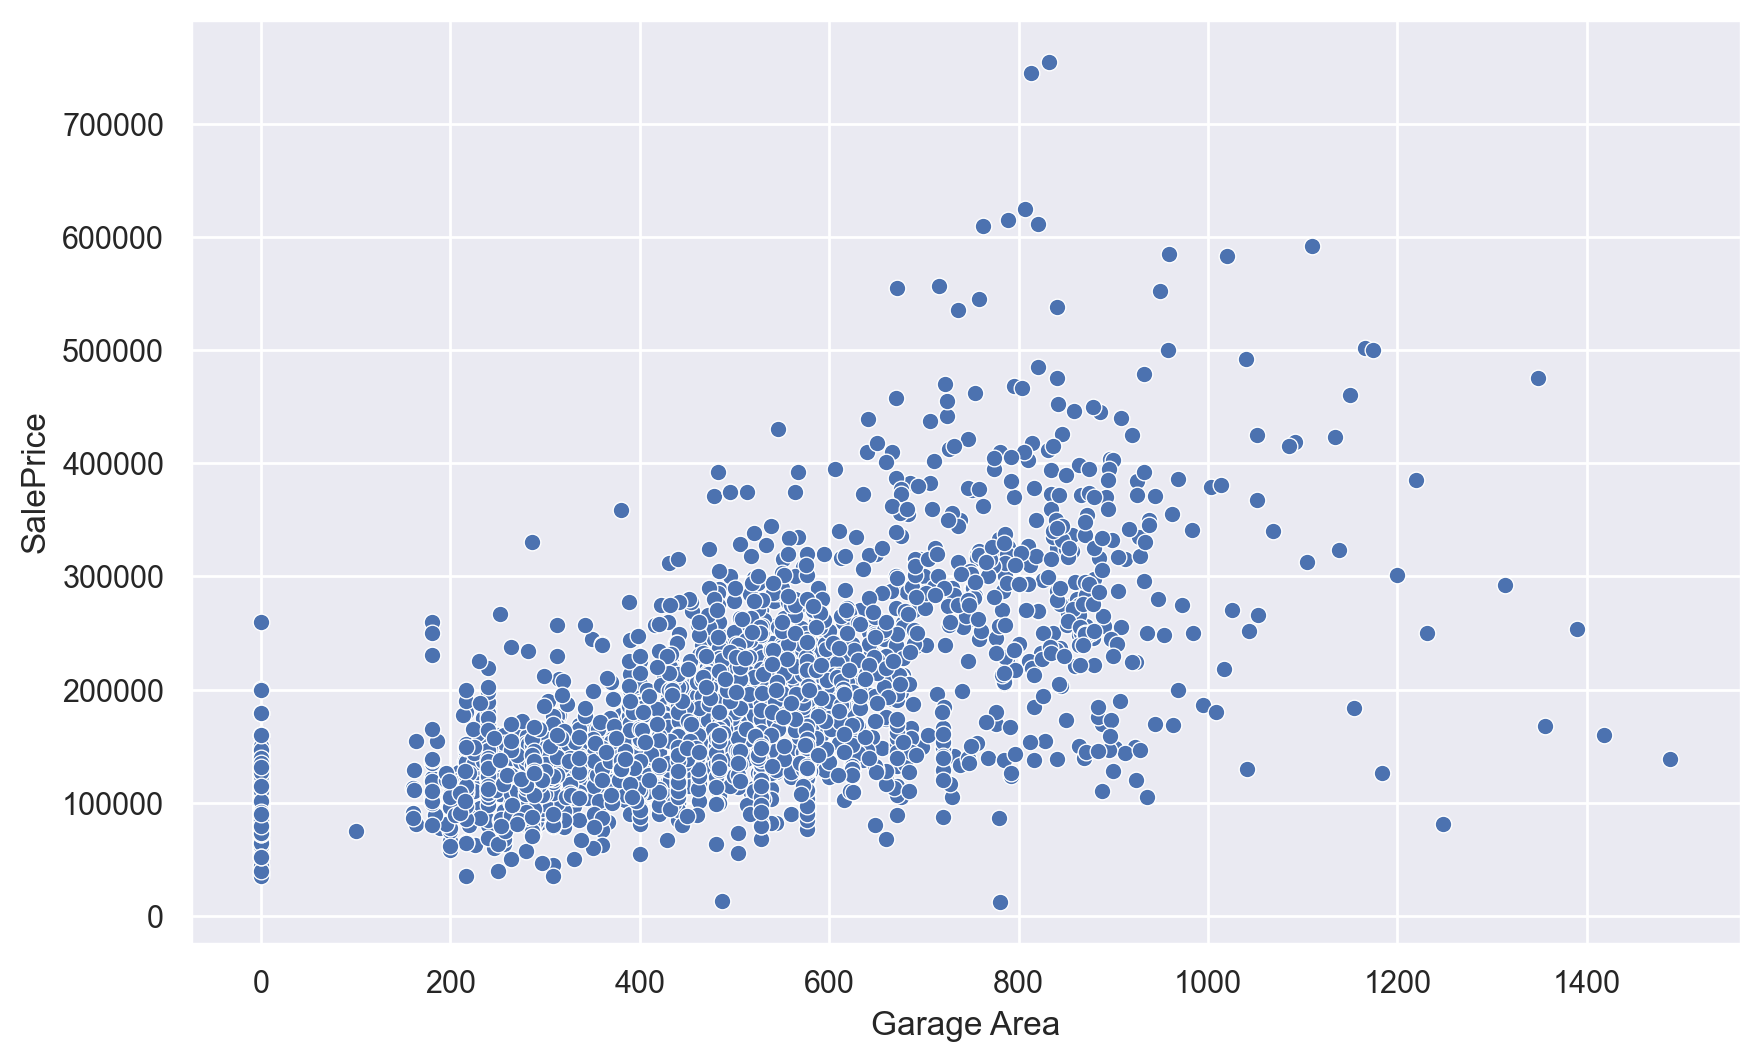

In [30]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data['Garage Area'], y=data["SalePrice"])

### 1st Flr SF

<Axes: xlabel='1st Flr SF', ylabel='Count'>

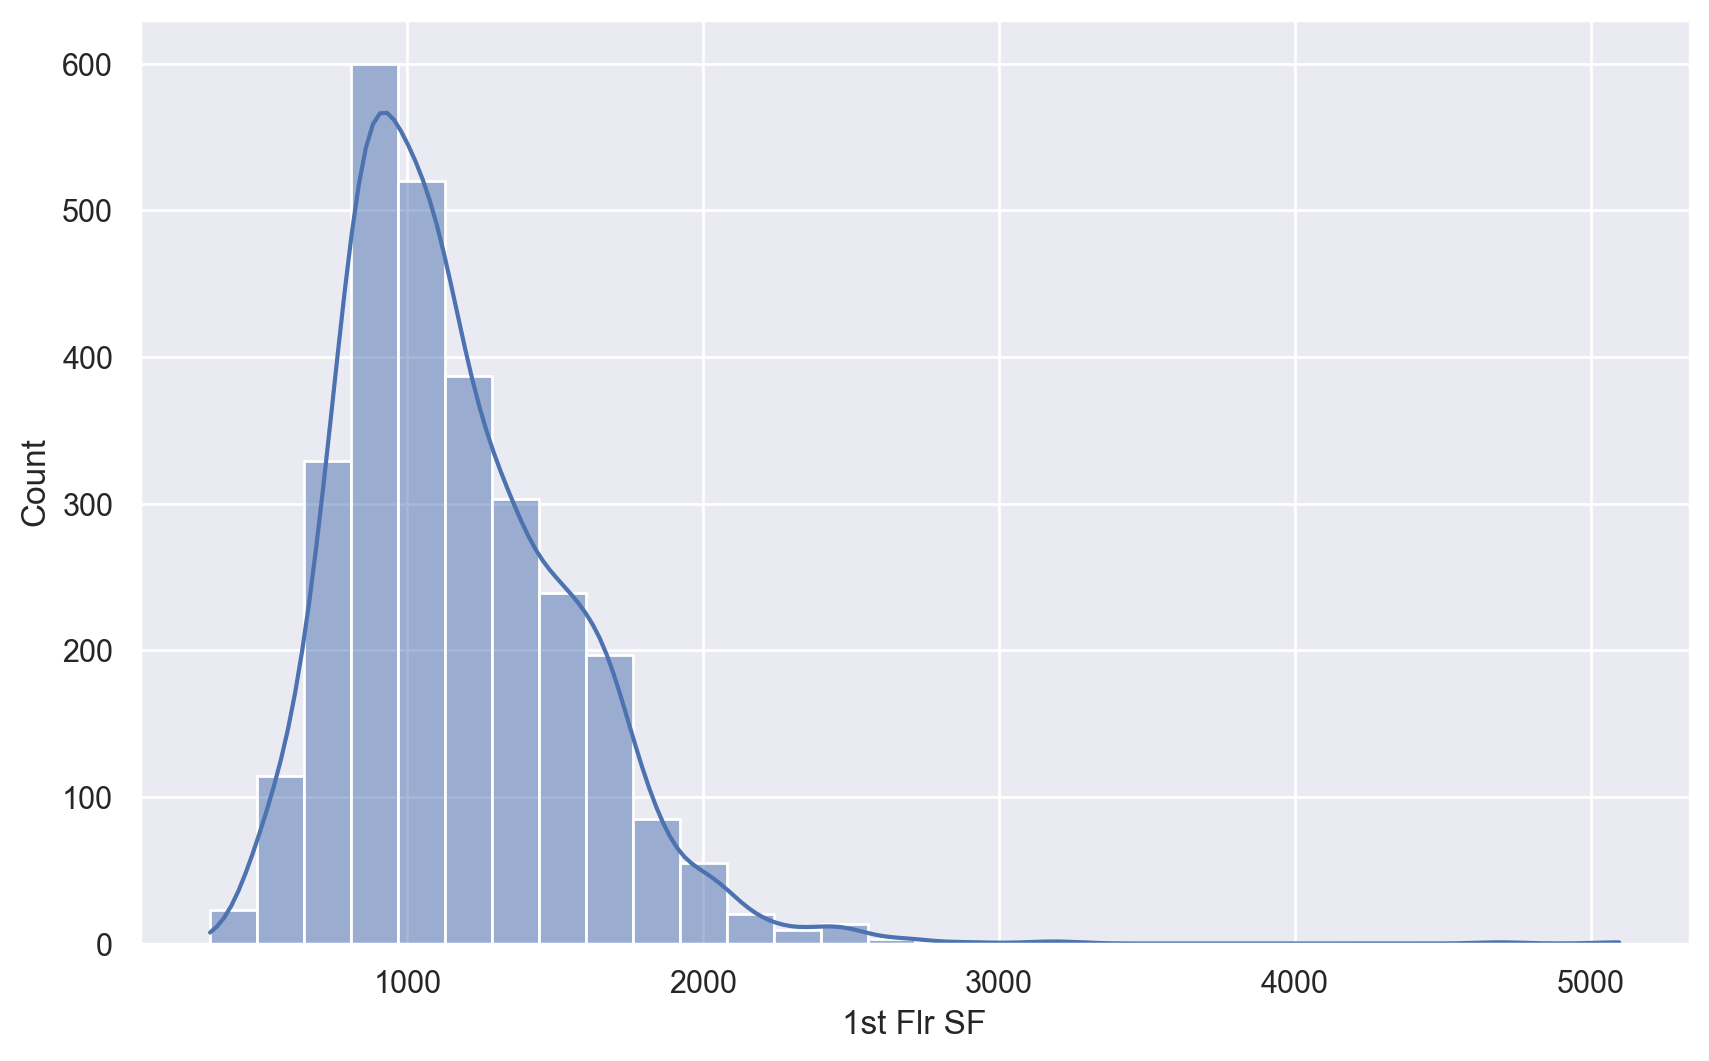

In [31]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(data["1st Flr SF"], bins=30, kde=True)

<Axes: xlabel='1st Flr SF', ylabel='SalePrice'>

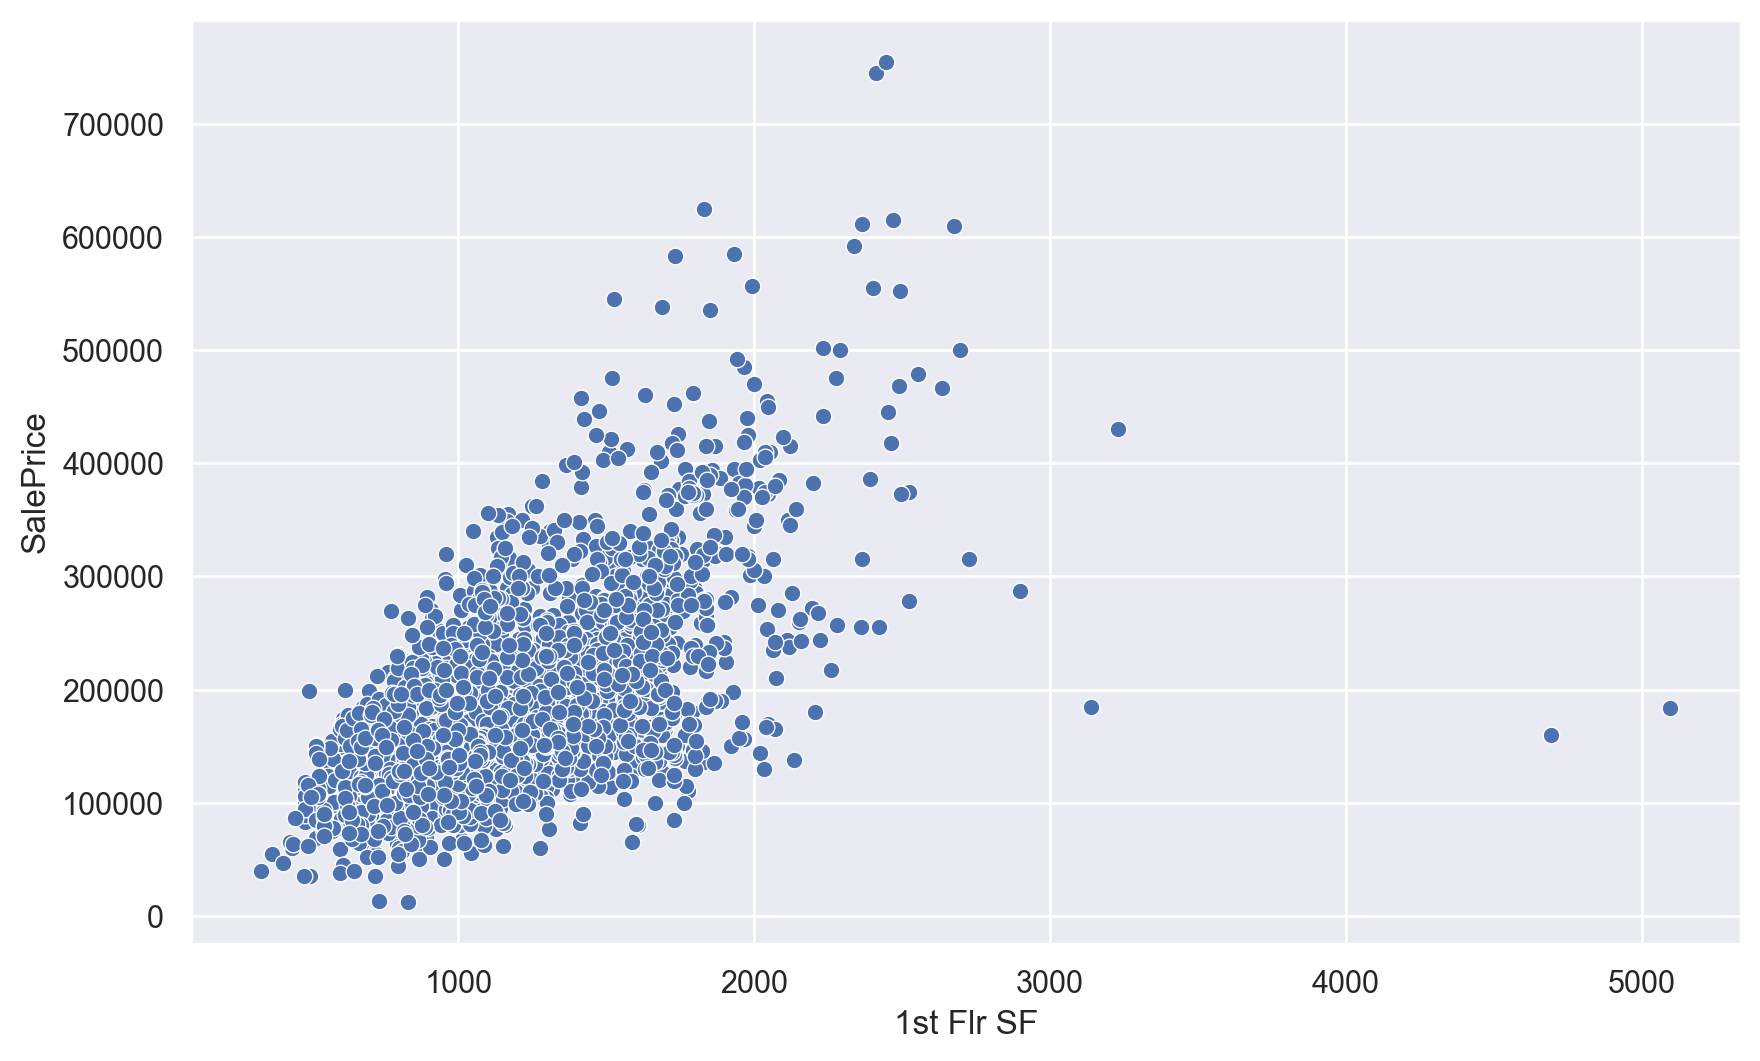

In [32]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data['1st Flr SF'], y=data["SalePrice"])

### Year Built

<Axes: xlabel='Year Built', ylabel='SalePrice'>

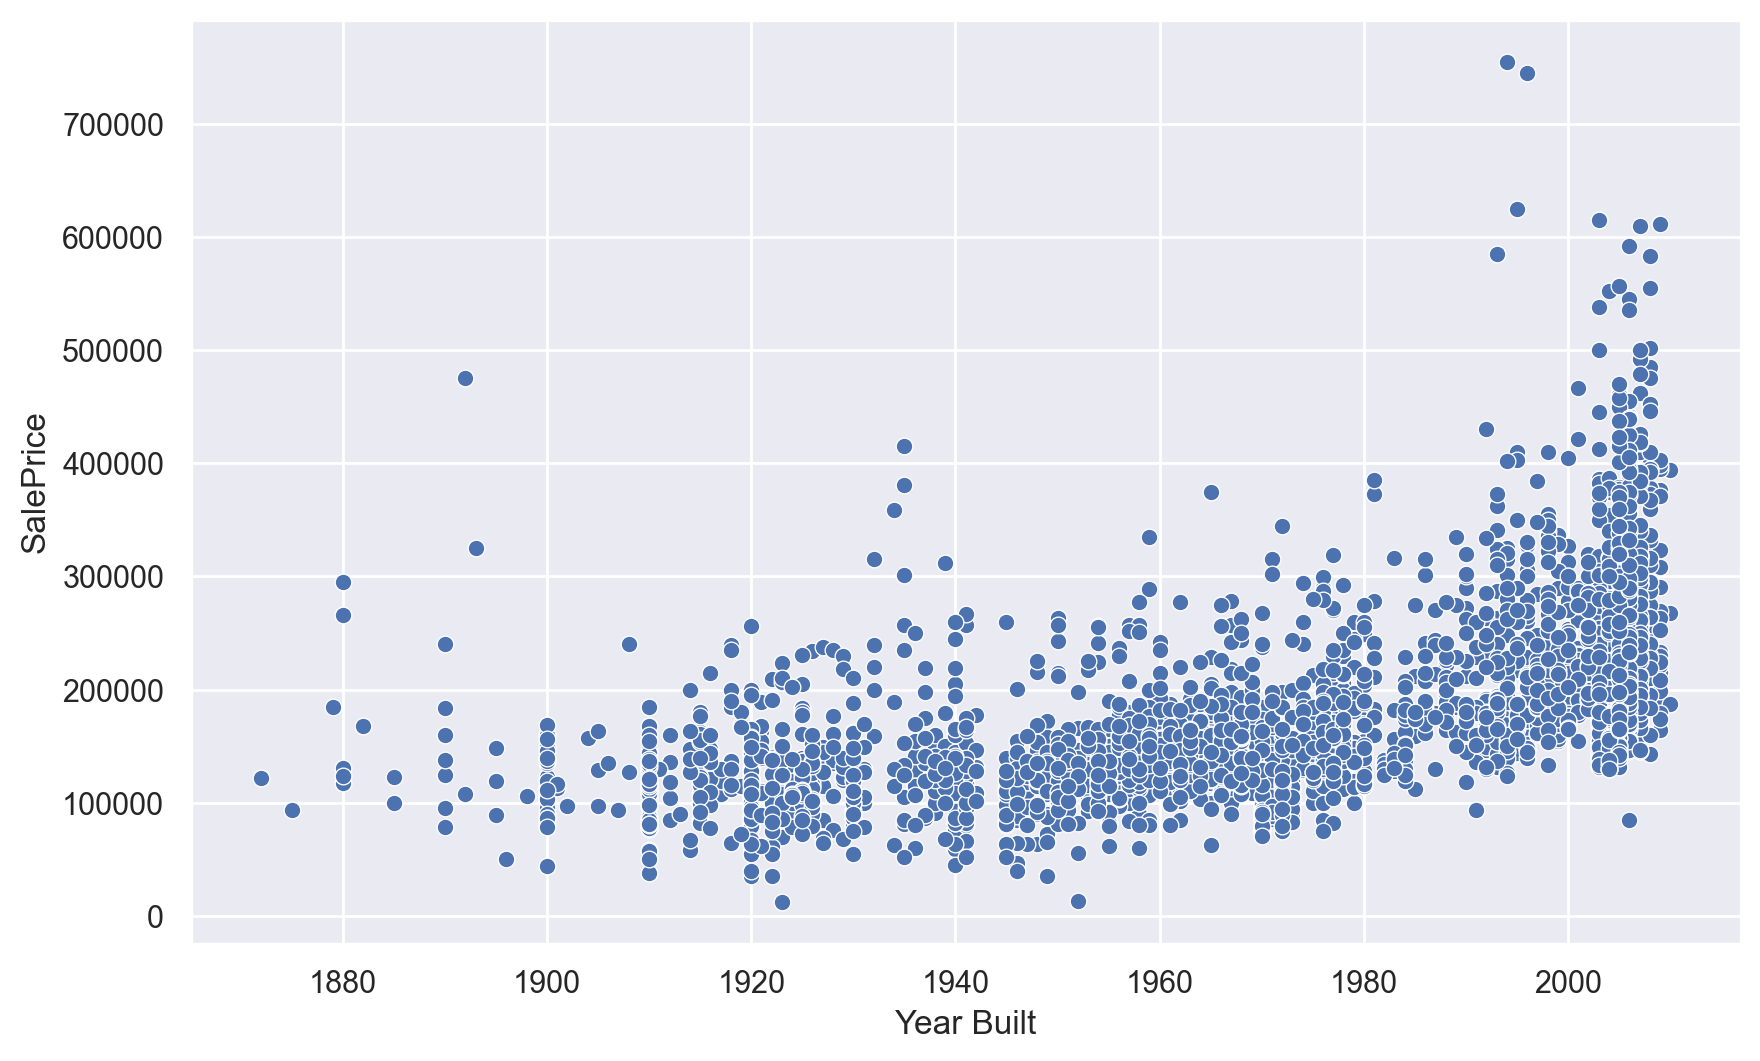

In [33]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data['Year Built'], y=data["SalePrice"])

<Axes: xlabel='Year Built', ylabel='Count'>

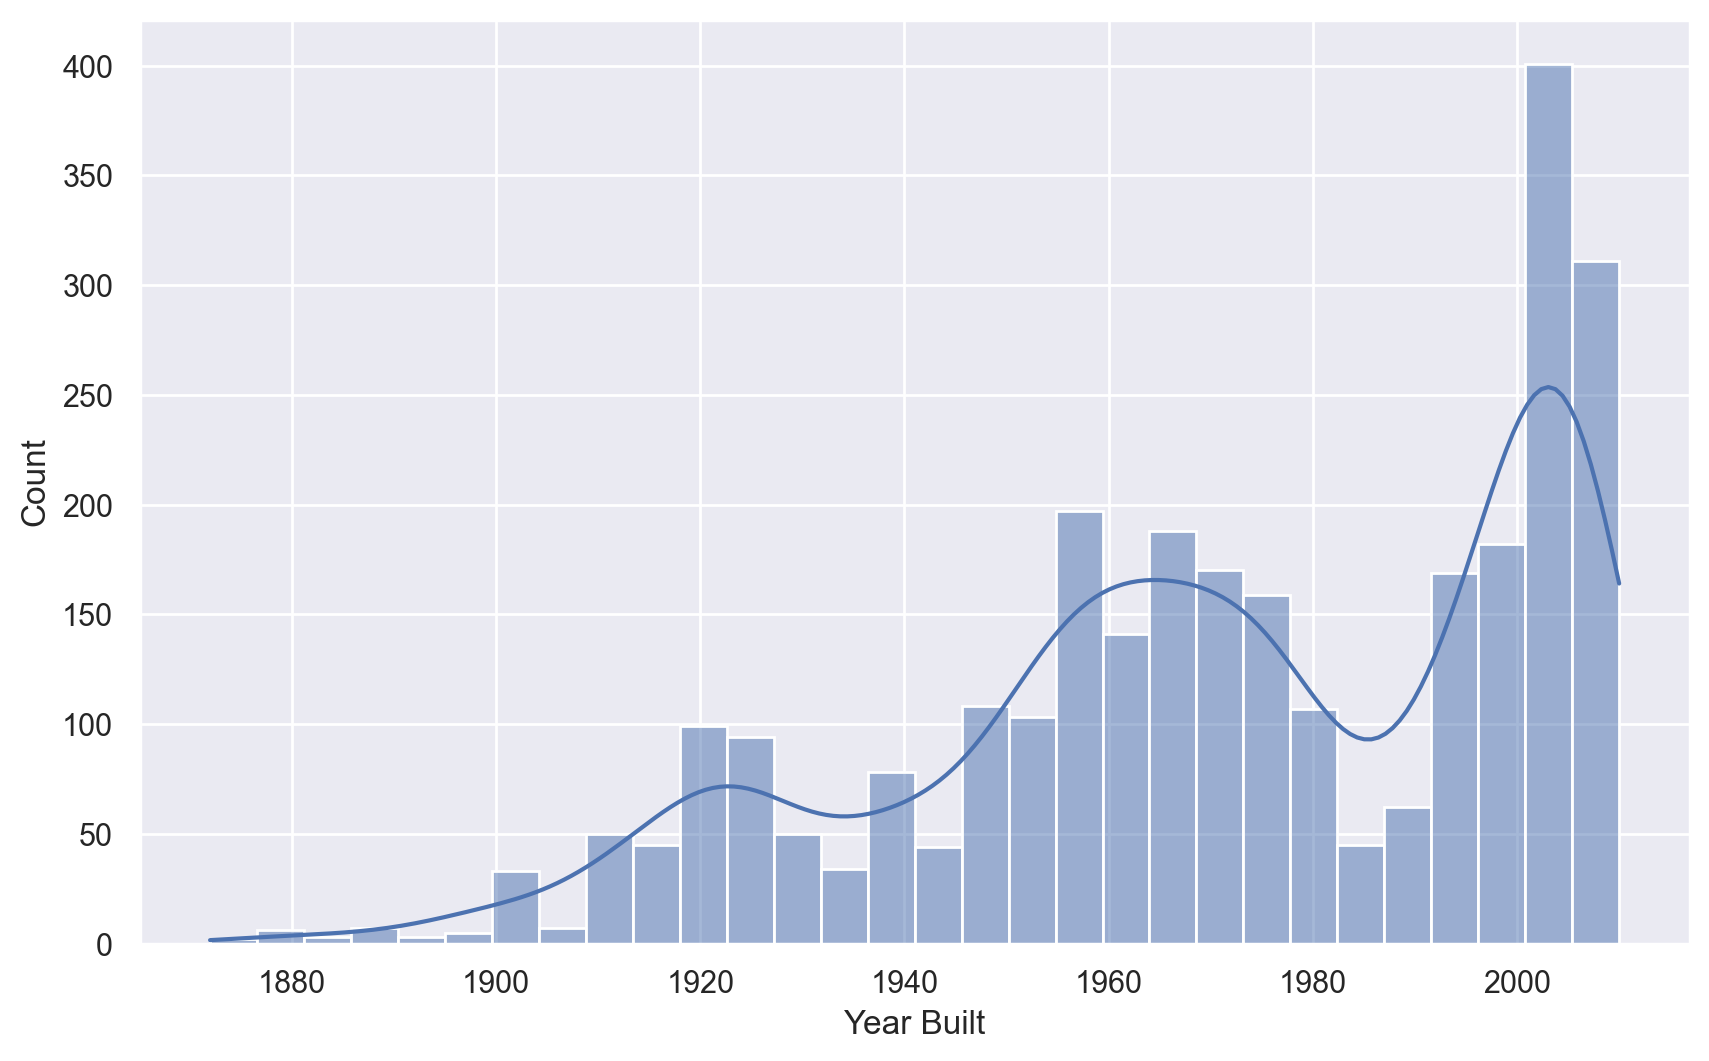

In [34]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(data["Year Built"], bins=30, kde=True)

### Year Remod/Add

<Axes: xlabel='Year Remod/Add', ylabel='SalePrice'>

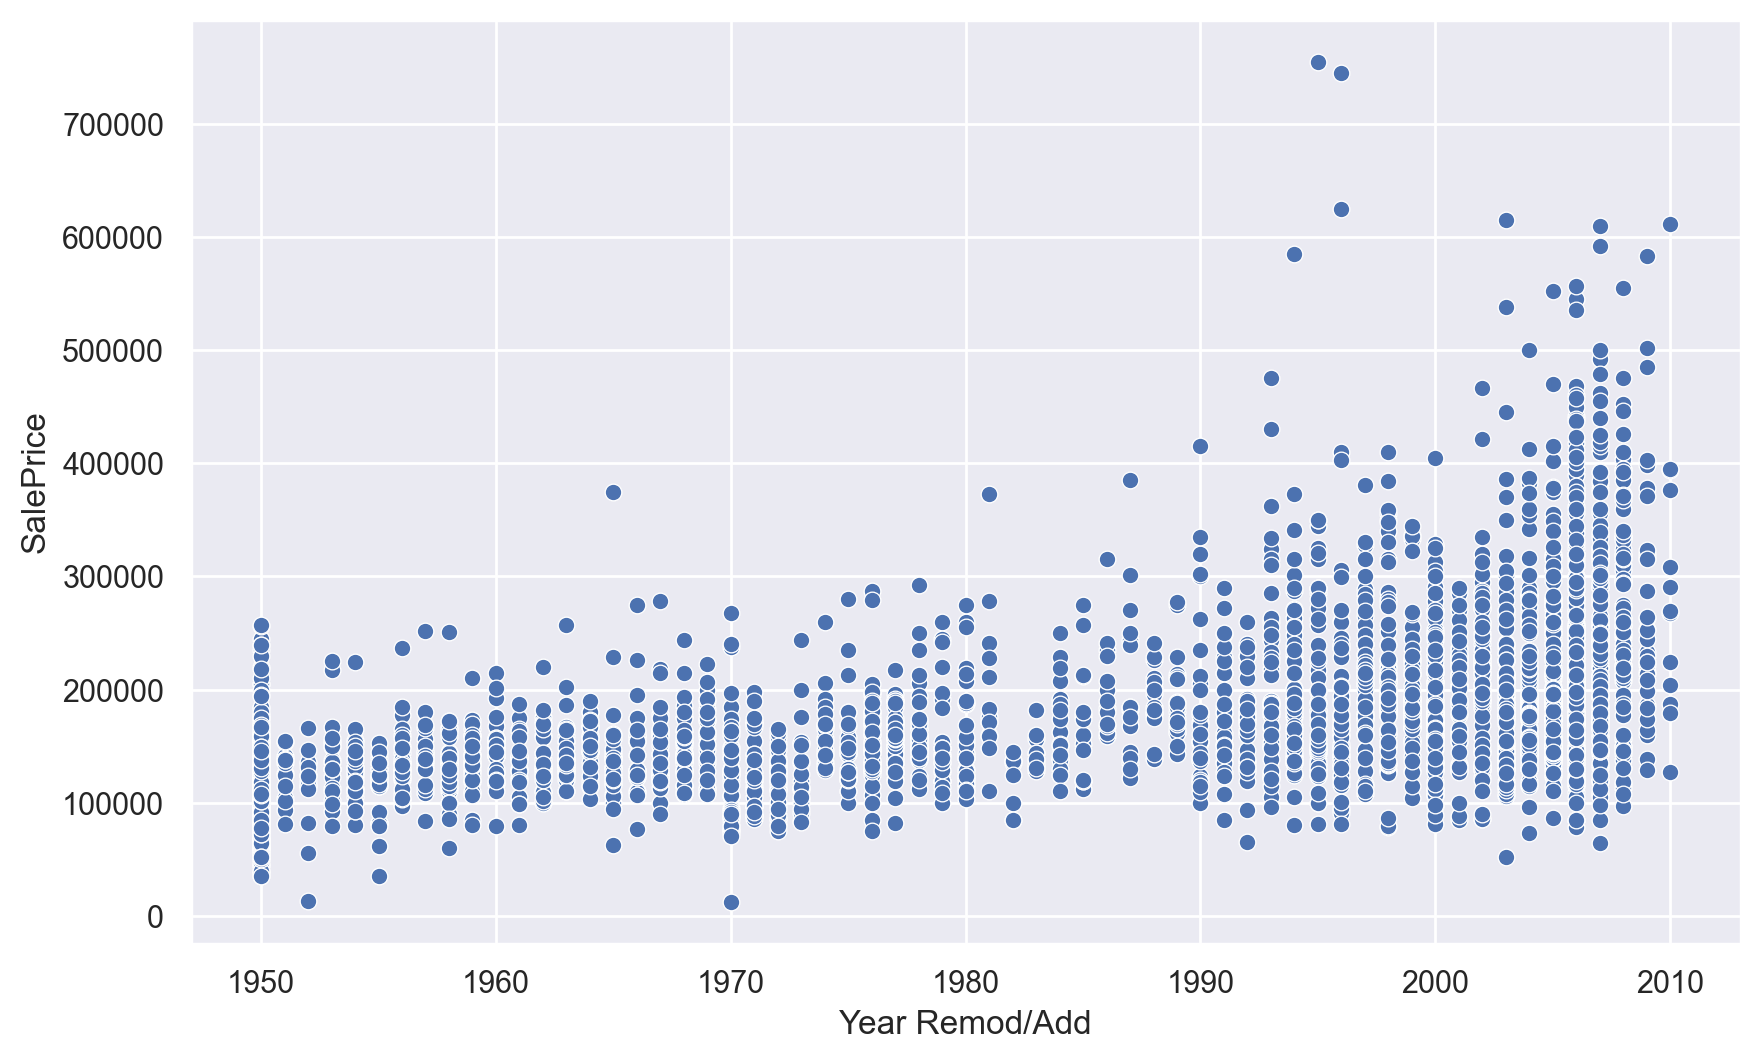

In [35]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data['Year Remod/Add'], y=data["SalePrice"])

<Axes: xlabel='Year Remod/Add', ylabel='Count'>

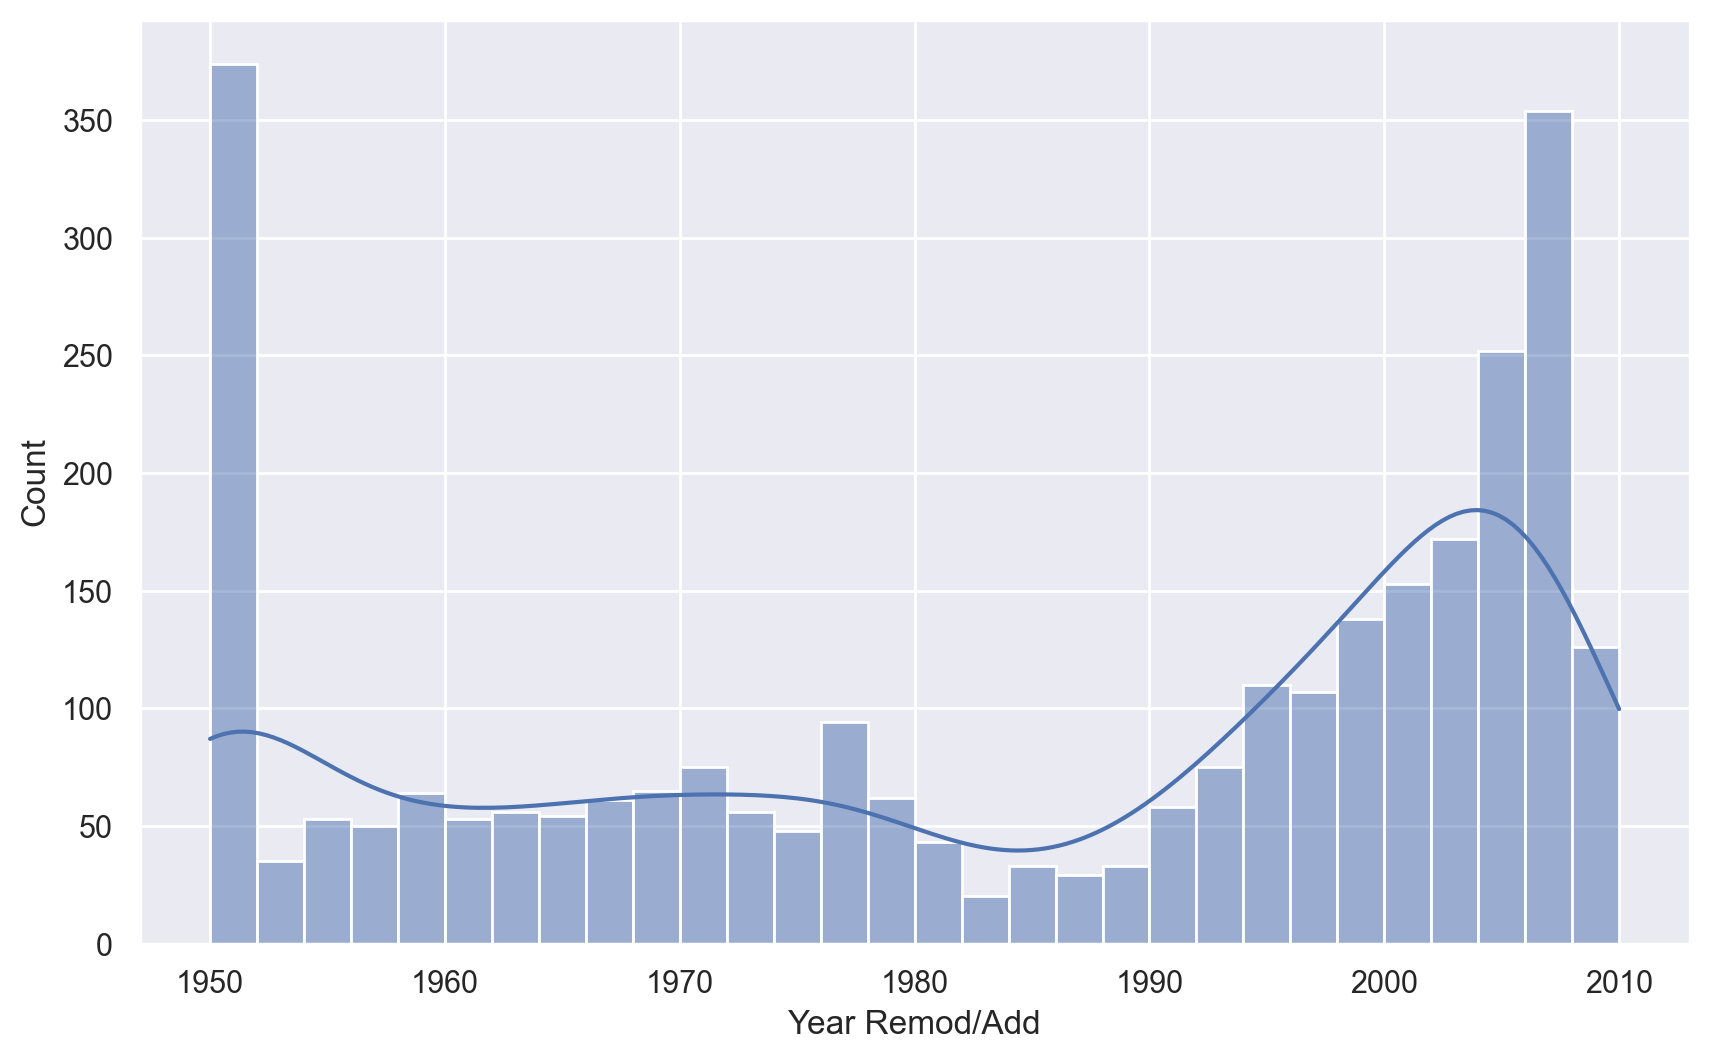

In [36]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(data["Year Remod/Add"], bins=30, kde=True)

### Mas Vnr Area

<Axes: xlabel='Mas Vnr Area', ylabel='Count'>

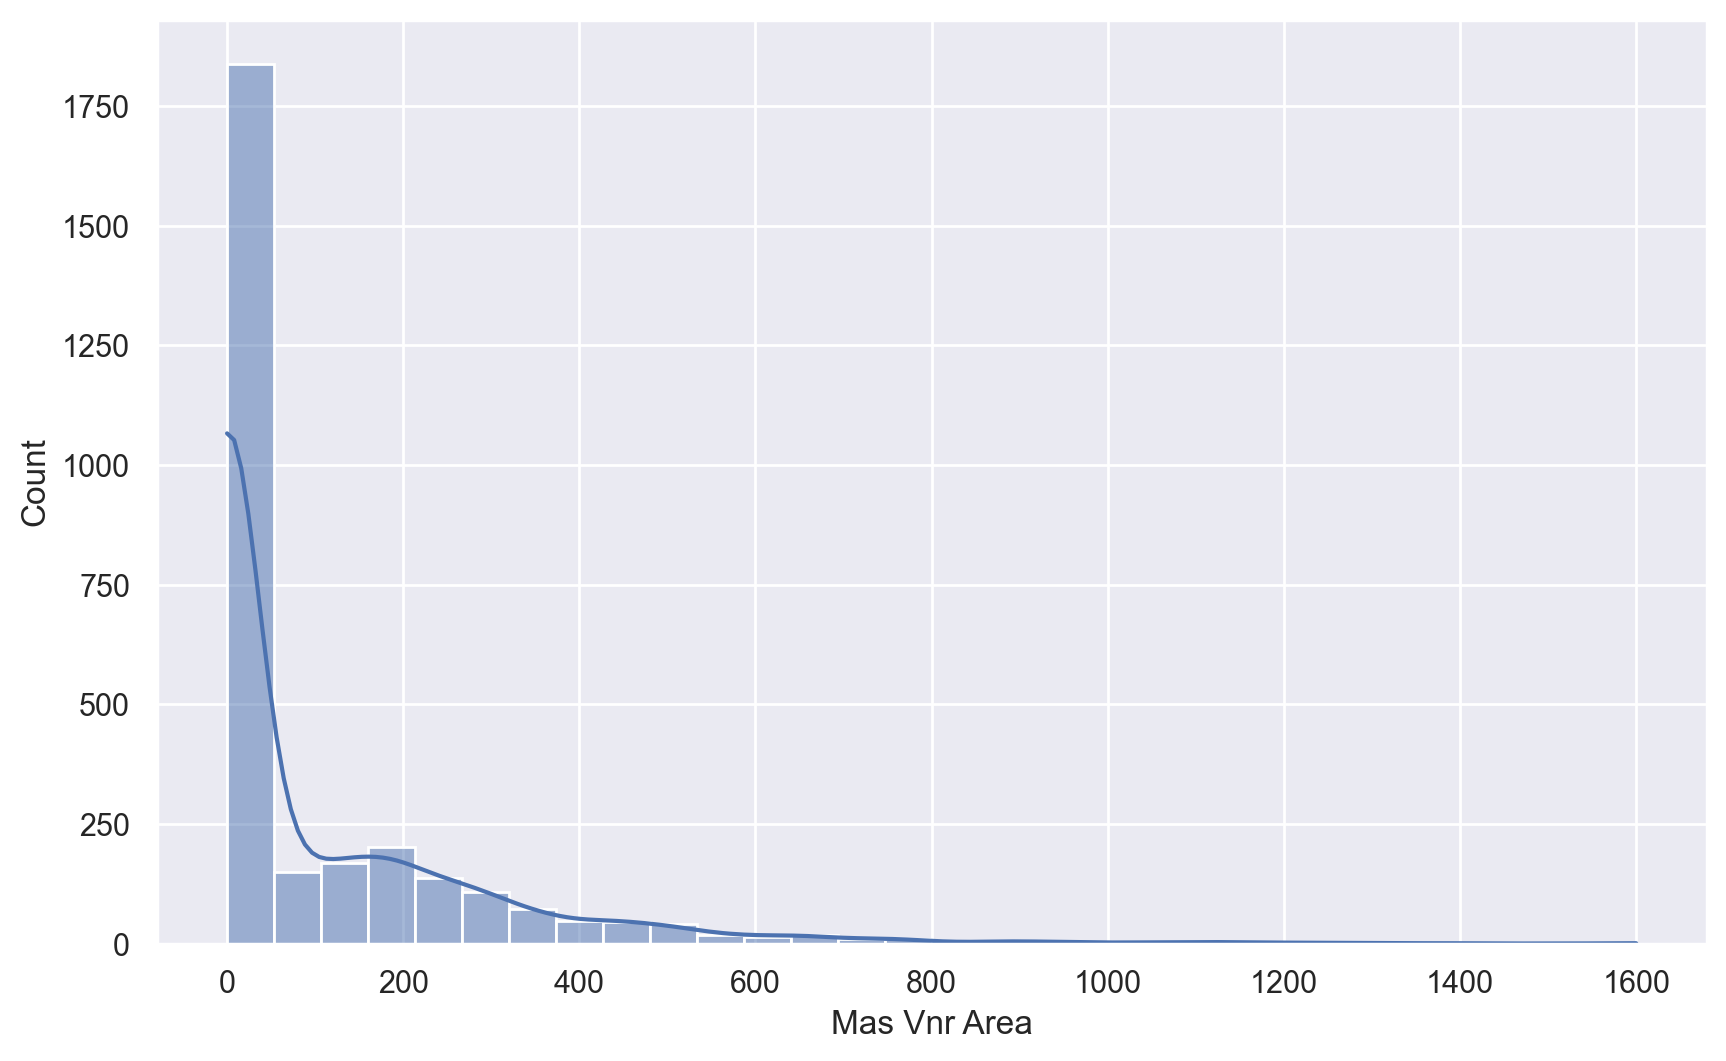

In [37]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(data["Mas Vnr Area"], bins=30, kde=True)

<Axes: xlabel='Mas Vnr Area', ylabel='SalePrice'>

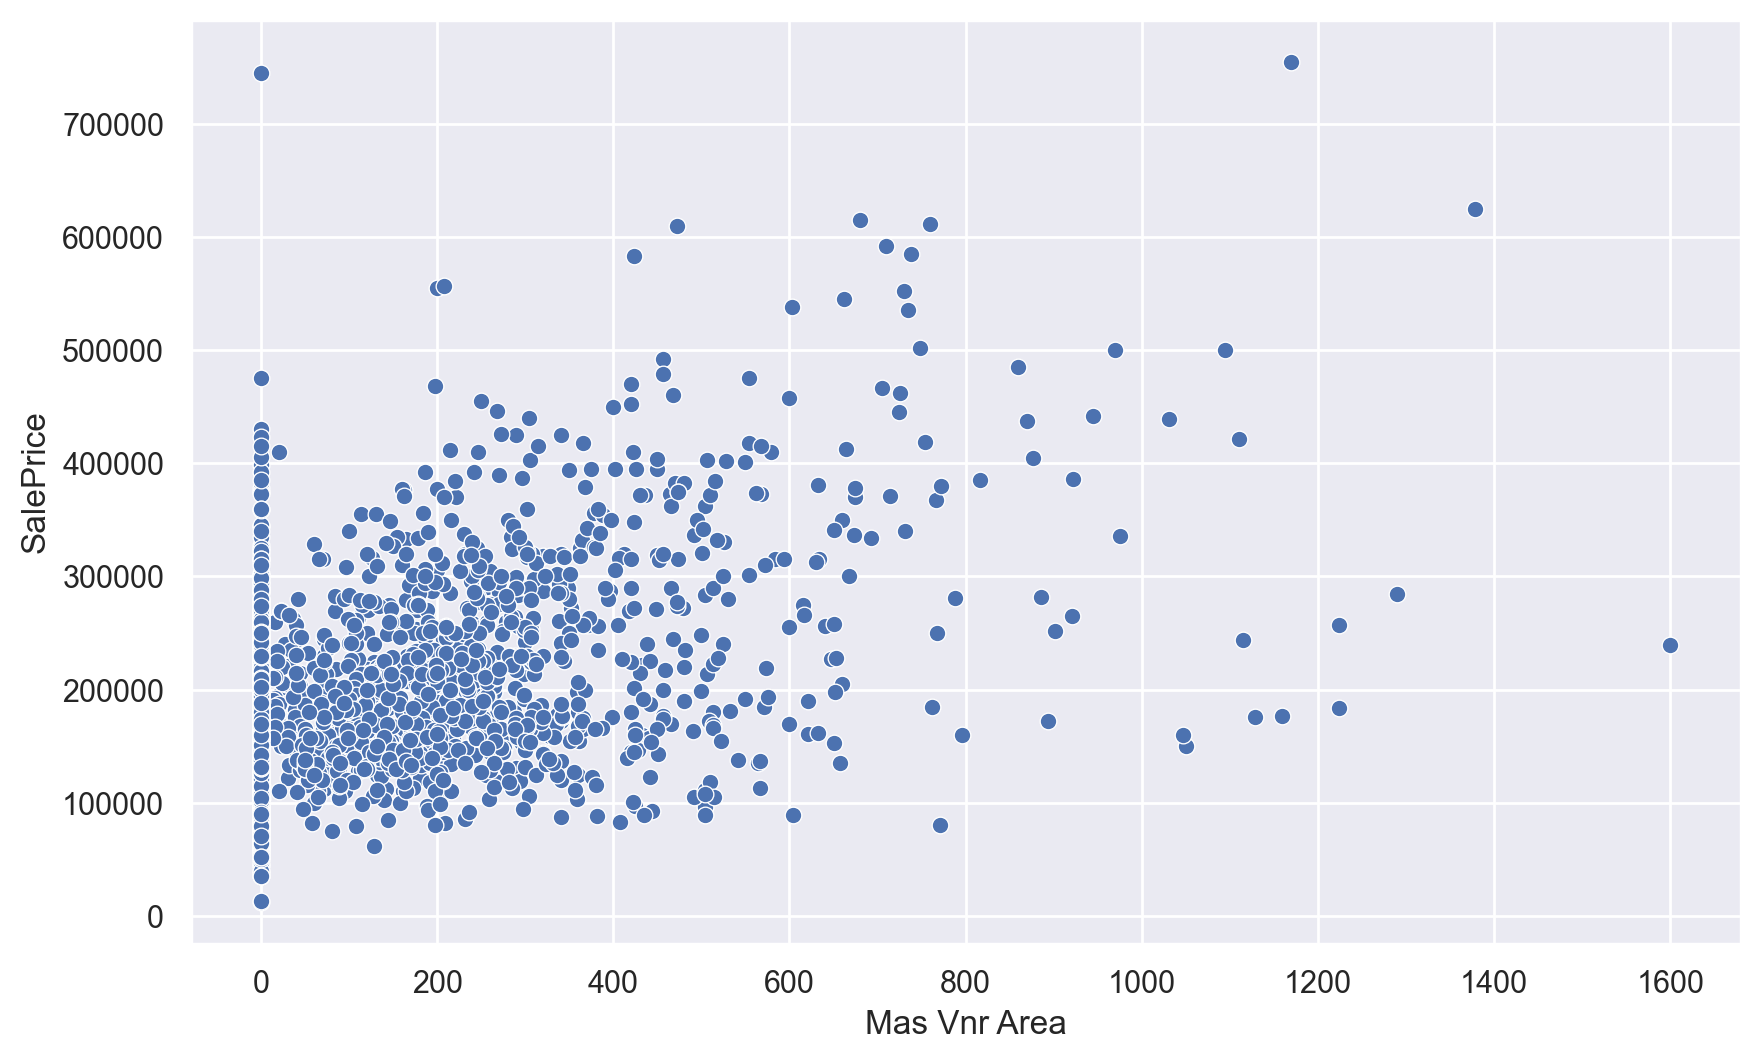

In [38]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data['Mas Vnr Area'], y=data["SalePrice"])

In [39]:
biggest_corr=['Overall Qual',
 'Gr Liv Area',
 'Total Bsmt SF',
 'Garage Cars',
 'Garage Area',
 '1st Flr SF',
 'Year Built',
 'Full Bath',
 'Year Remod/Add',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Fireplaces',
 'BsmtFin SF 1',
 'Lot Frontage',
 'Wood Deck SF',
 'Open Porch SF',
 ]

### TotRms AbvGrd

<Axes: xlabel='TotRms AbvGrd', ylabel='Count'>

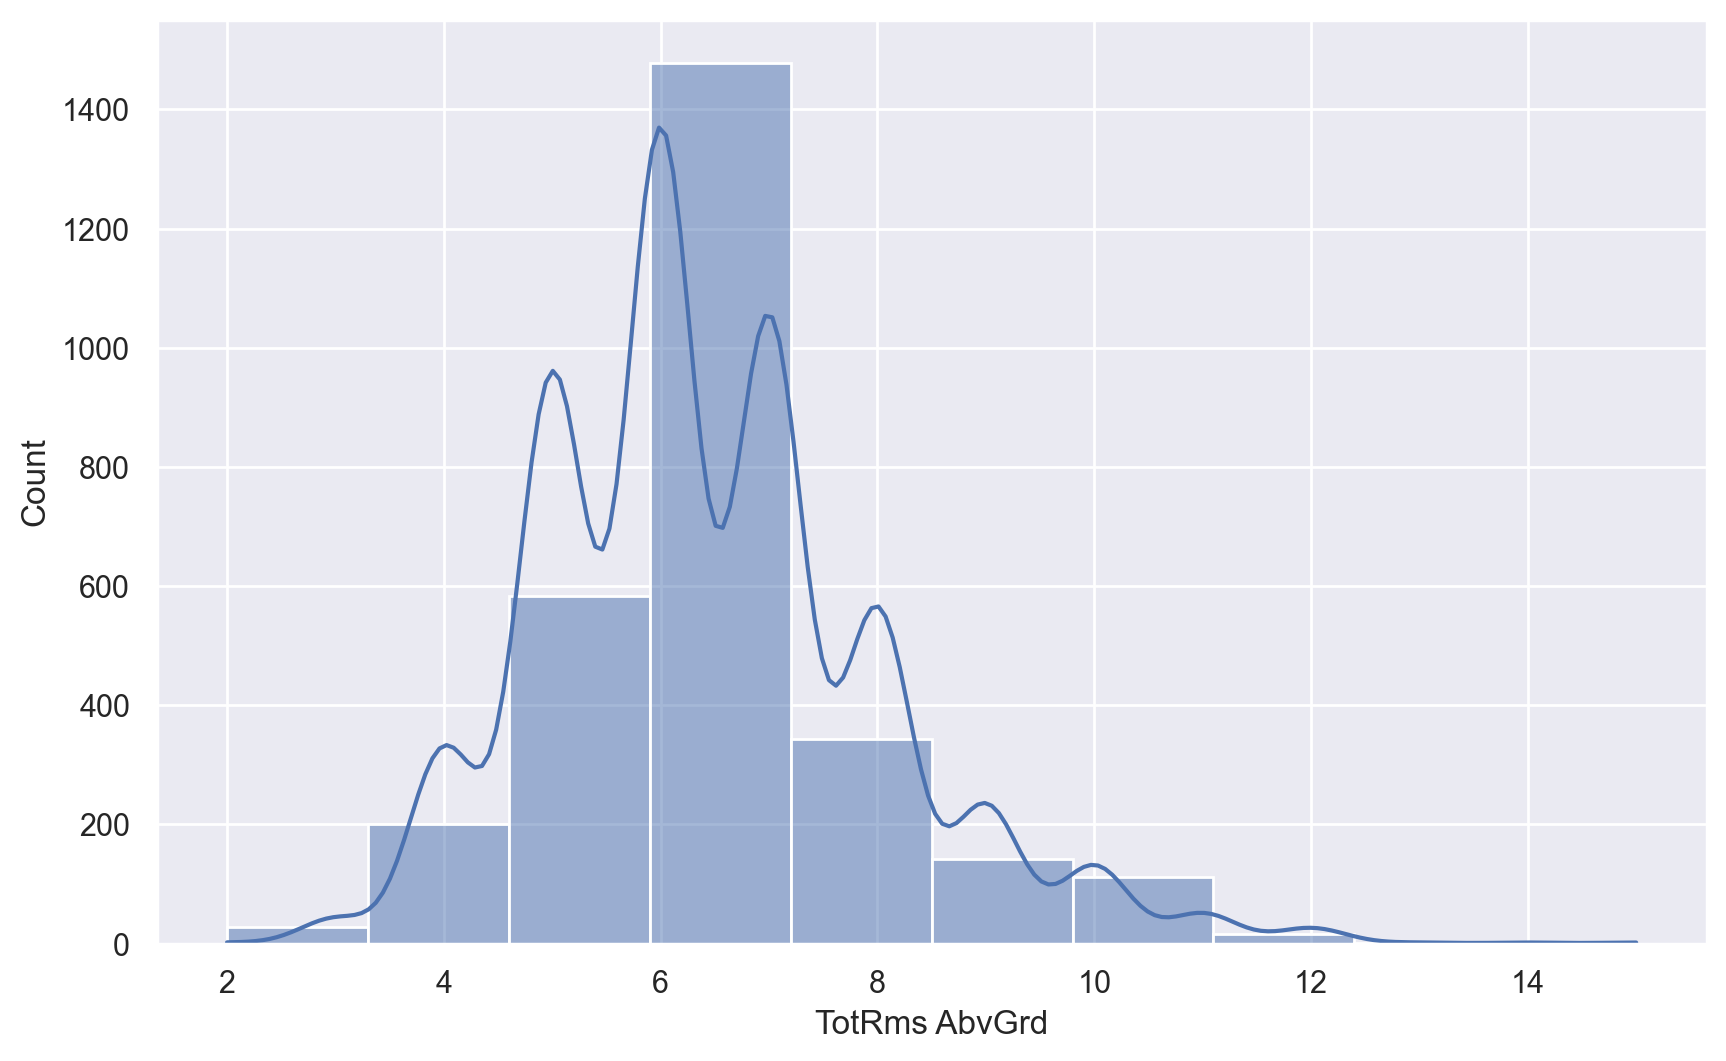

In [40]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(data["TotRms AbvGrd"], bins=10, kde=True)

<Axes: xlabel='TotRms AbvGrd', ylabel='SalePrice'>

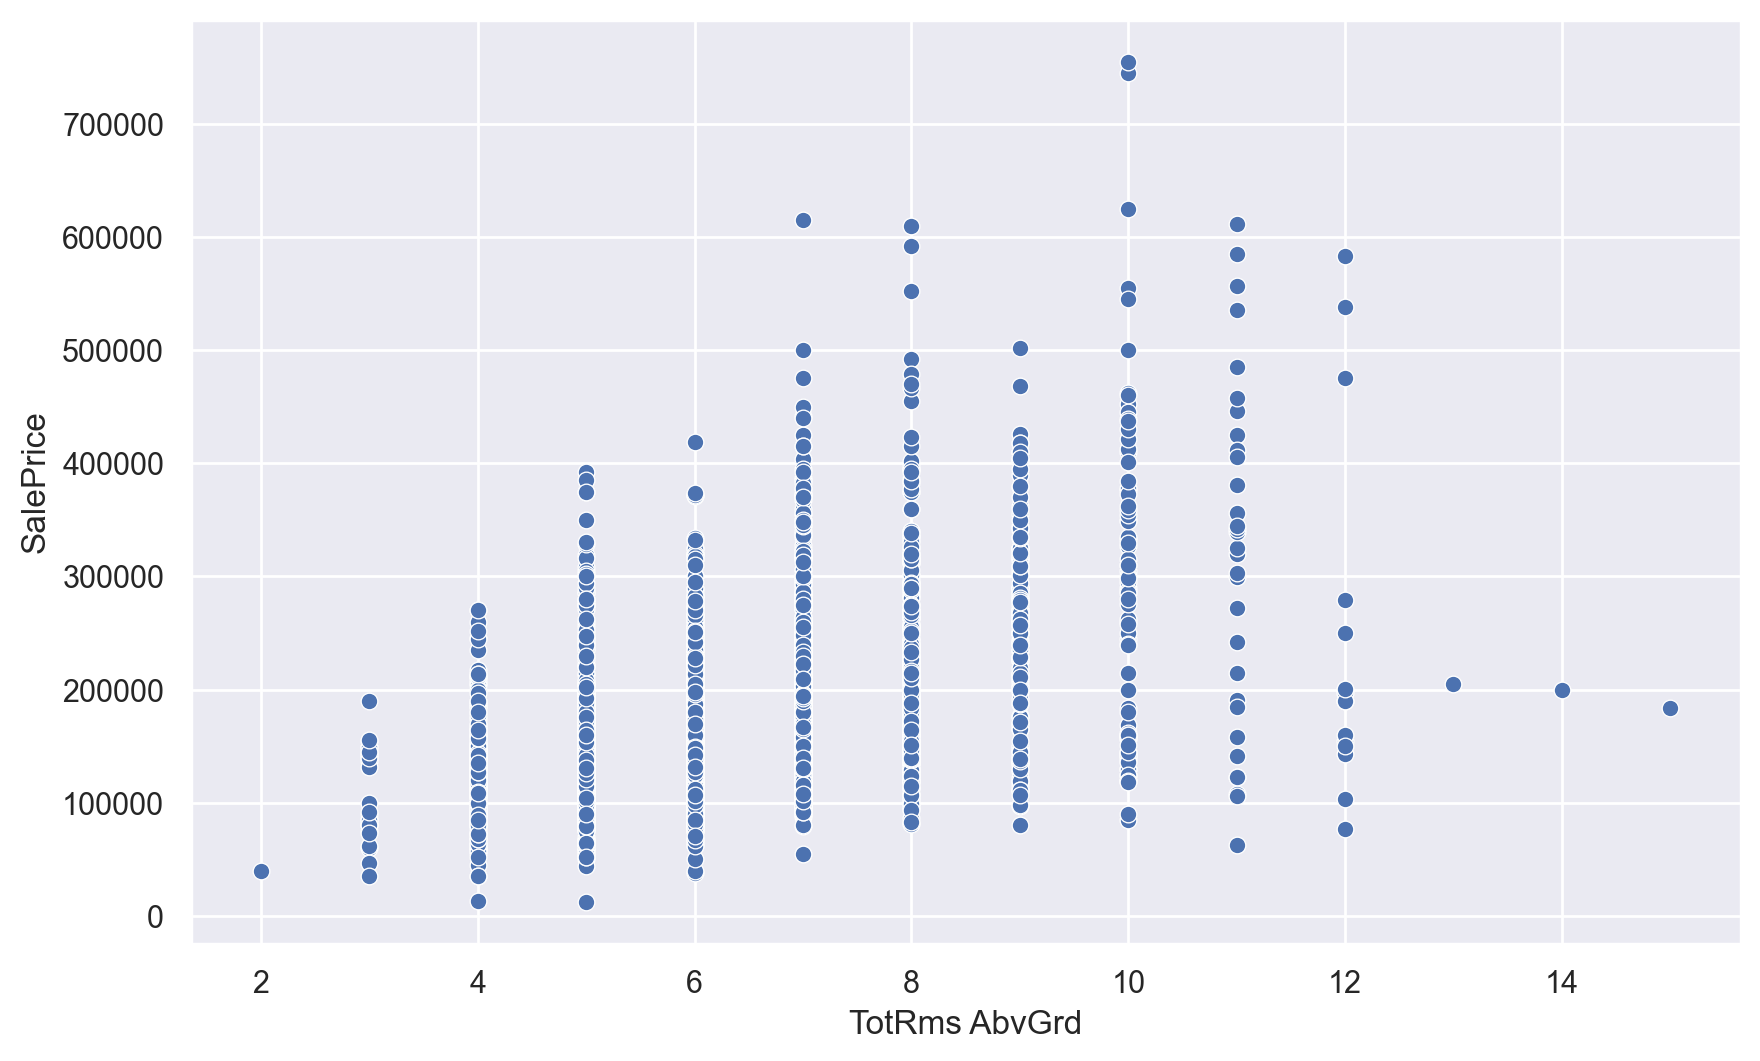

In [41]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data['TotRms AbvGrd'], y=data["SalePrice"])

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='TotRms AbvGrd'>

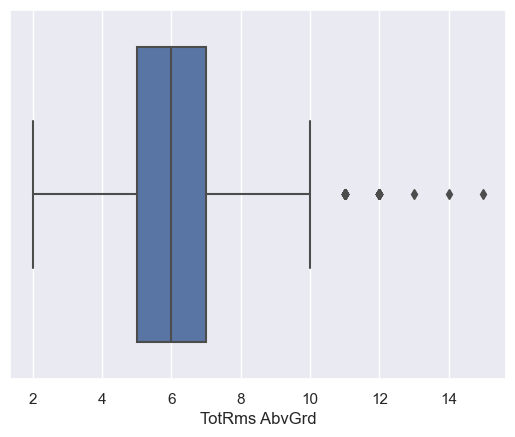

In [42]:
sns.boxplot(data['TotRms AbvGrd'])

### BsmtFin SF 1

In [43]:
data["BsmtFin SF 1"].describe()

count    2903.000000
mean      442.734757
std       455.262103
min         0.000000
25%         0.000000
50%       370.000000
75%       734.000000
max      5644.000000
Name: BsmtFin SF 1, dtype: float64

<Axes: xlabel='BsmtFin SF 1', ylabel='SalePrice'>

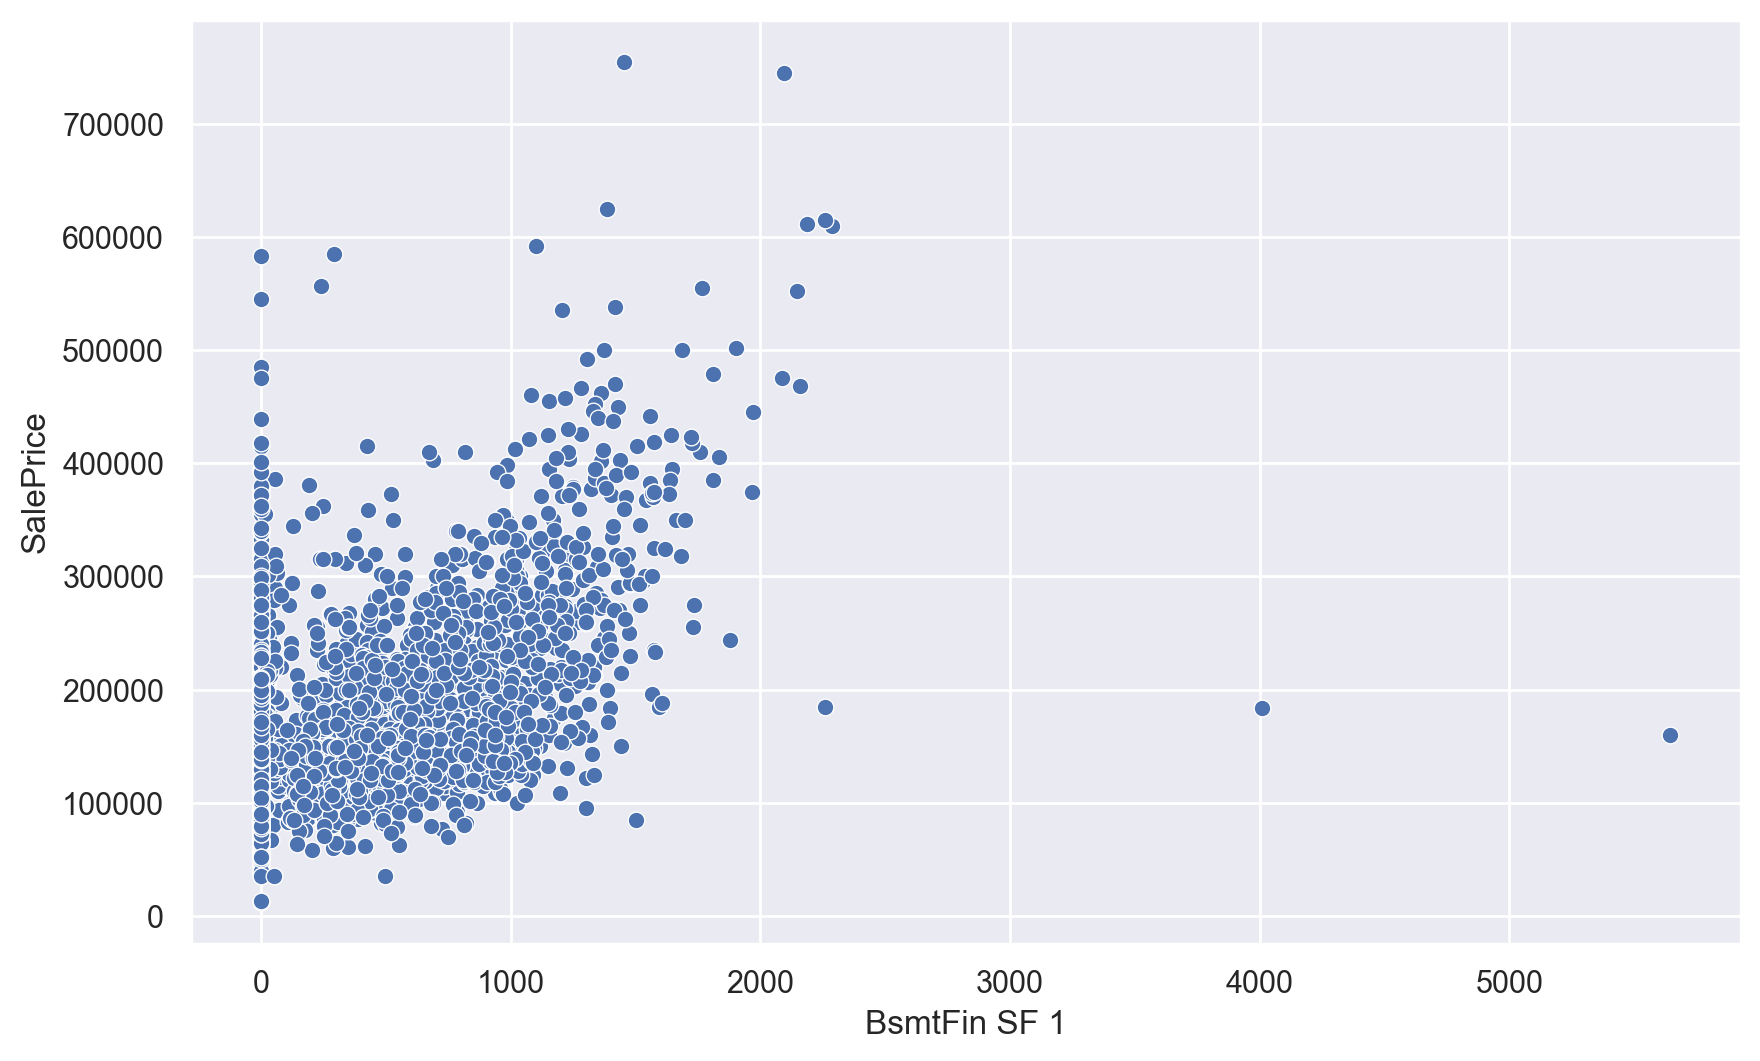

In [44]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data['BsmtFin SF 1'], y=data["SalePrice"])

<Axes: xlabel='BsmtFin SF 1', ylabel='Count'>

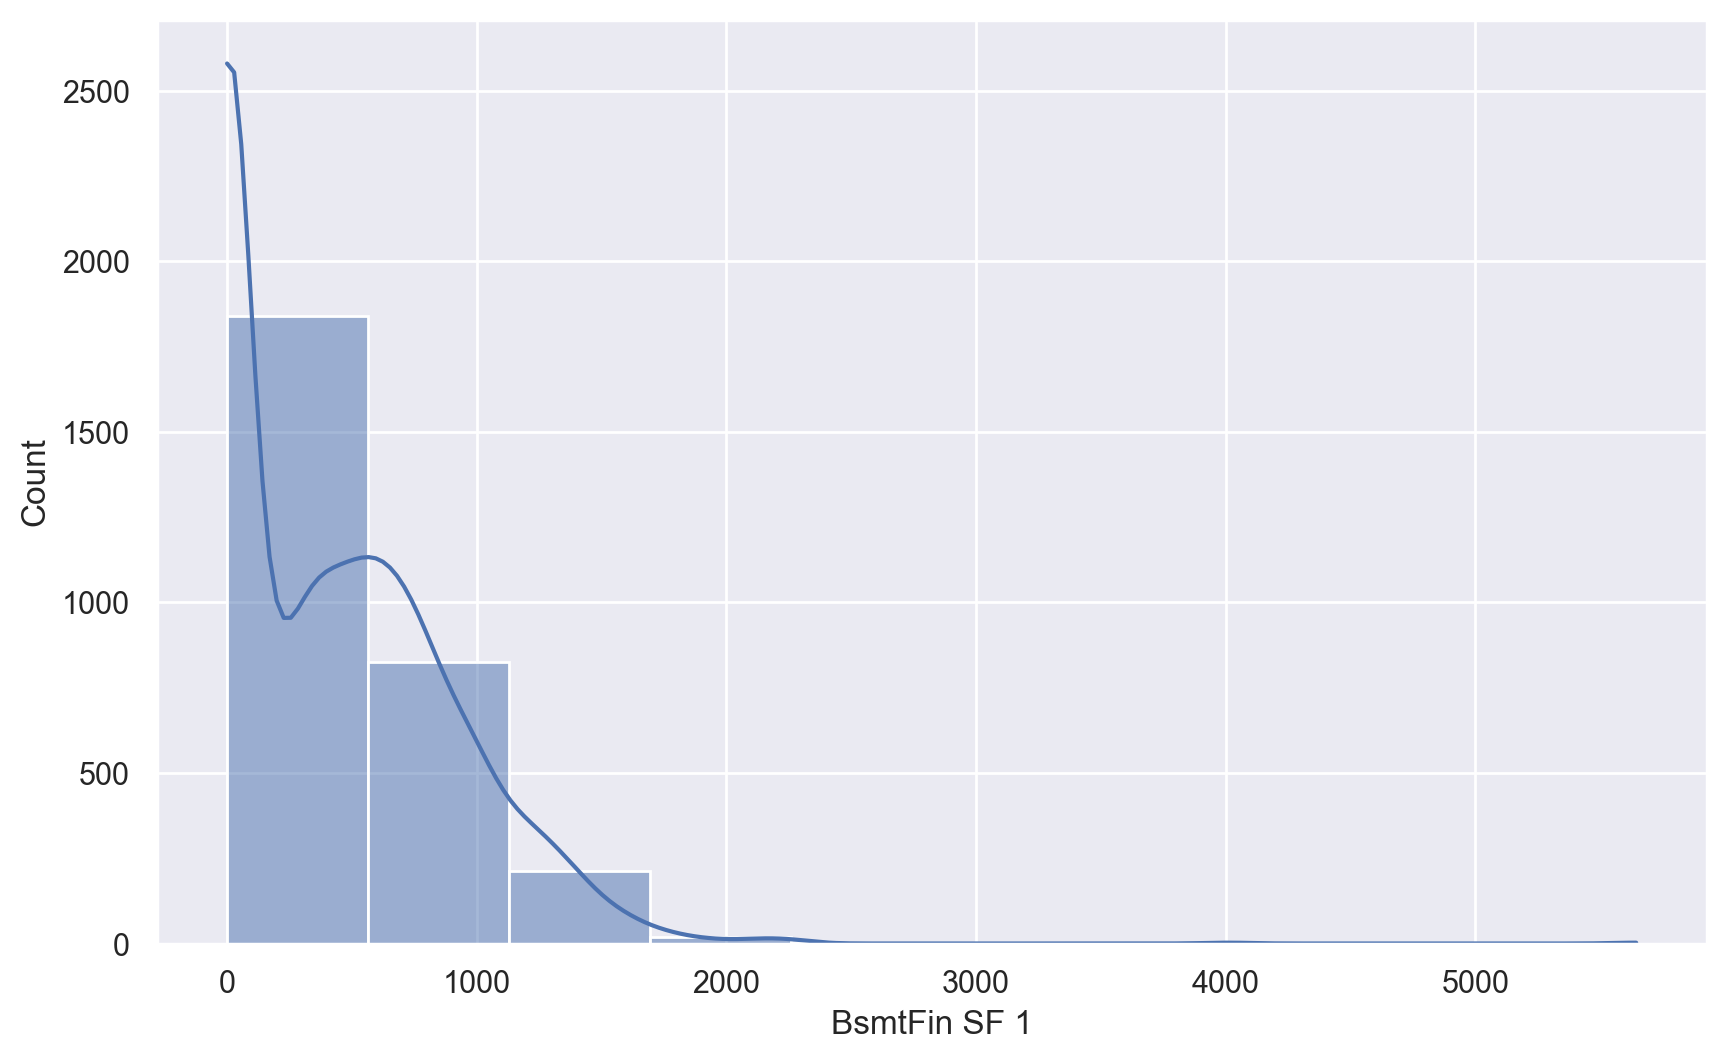

In [45]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(data["BsmtFin SF 1"], bins=10, kde=True)

### Lot frontage

In [46]:
data["Lot Frontage"].describe()

count    2903.000000
mean       69.191610
std        21.379783
min        21.000000
25%        60.000000
50%        68.430495
75%        79.000000
max       313.000000
Name: Lot Frontage, dtype: float64

<Axes: xlabel='Lot Frontage', ylabel='Count'>

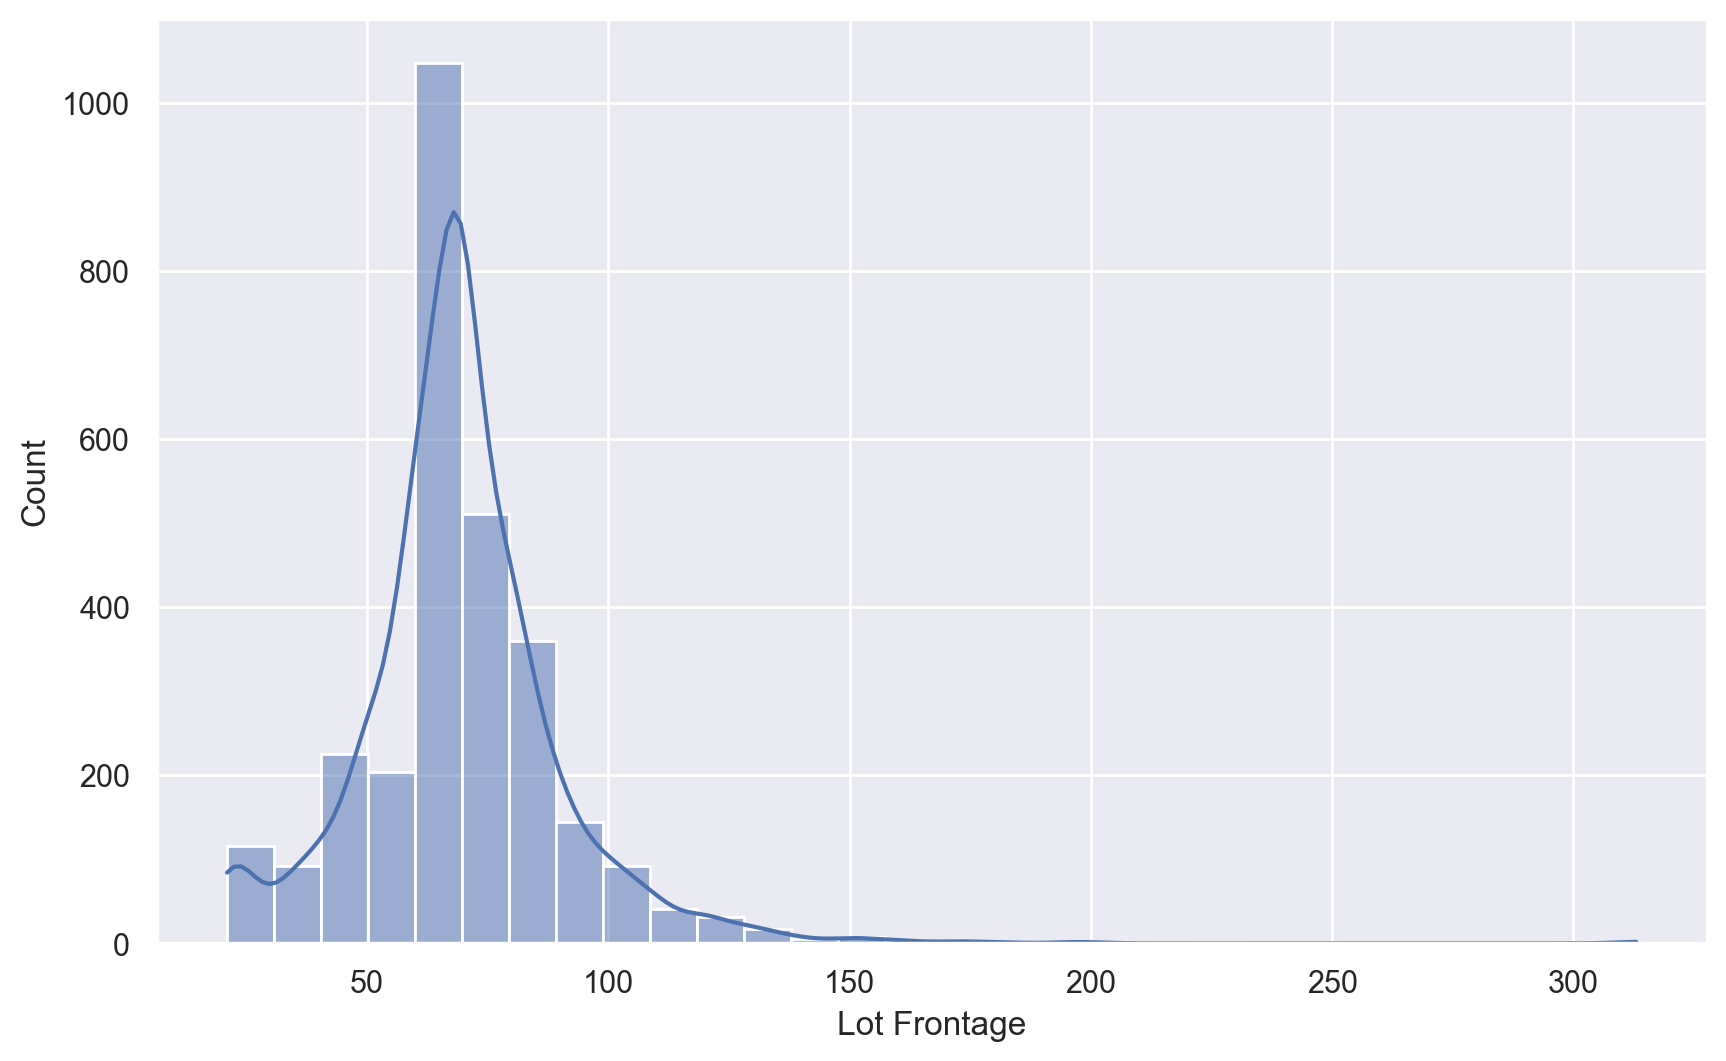

In [47]:
plt.figure(figsize=(10,6),dpi=200)
sns.histplot(data['Lot Frontage'], bins=30, kde=True)

<Axes: xlabel='Lot Frontage', ylabel='SalePrice'>

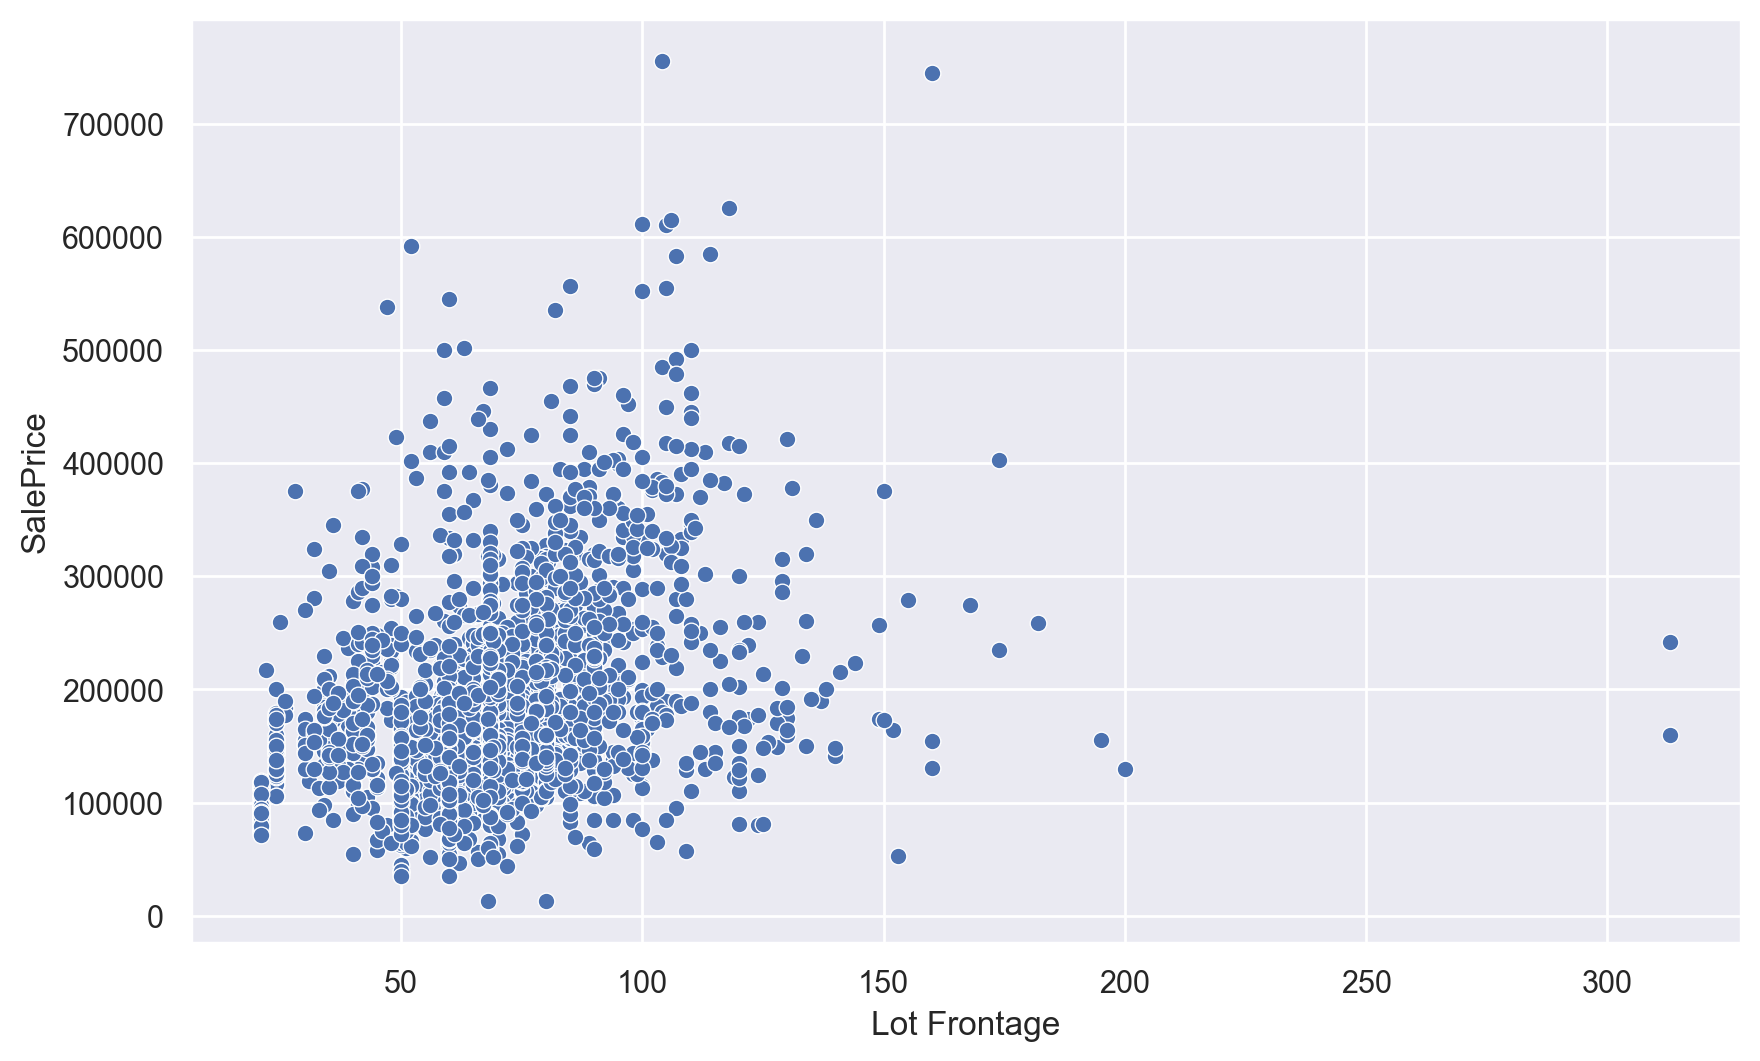

In [48]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data['Lot Frontage'], y=data["SalePrice"])

### Wood Deck SF

In [49]:
data["Wood Deck SF"].describe()

count    2903.000000
mean       94.004823
std       126.639721
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: Wood Deck SF, dtype: float64

<Axes: xlabel='Wood Deck SF', ylabel='SalePrice'>

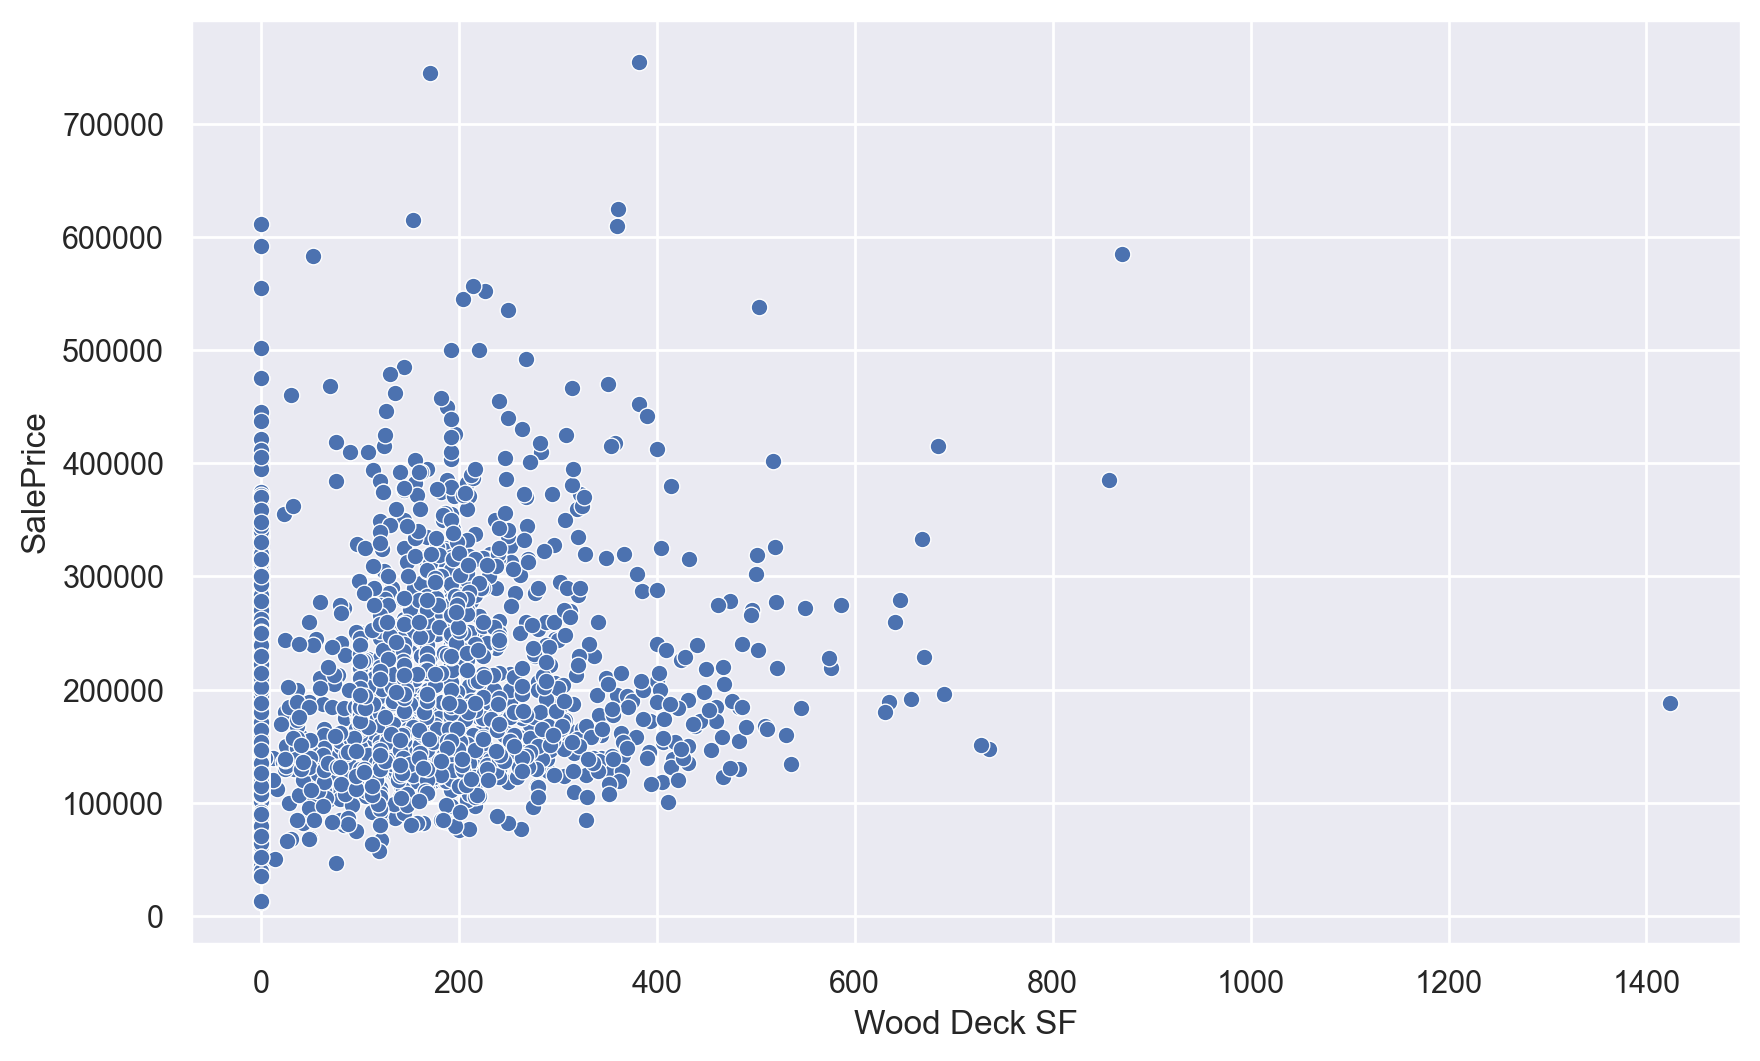

In [50]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data["Wood Deck SF"], y=data["SalePrice"])

### Open Porch SF

In [51]:
data["Open Porch SF"].describe()

count    2903.000000
mean       47.162590
std        67.045458
min         0.000000
25%         0.000000
50%        26.000000
75%        70.000000
max       742.000000
Name: Open Porch SF, dtype: float64

<Axes: xlabel='Open Porch SF', ylabel='SalePrice'>

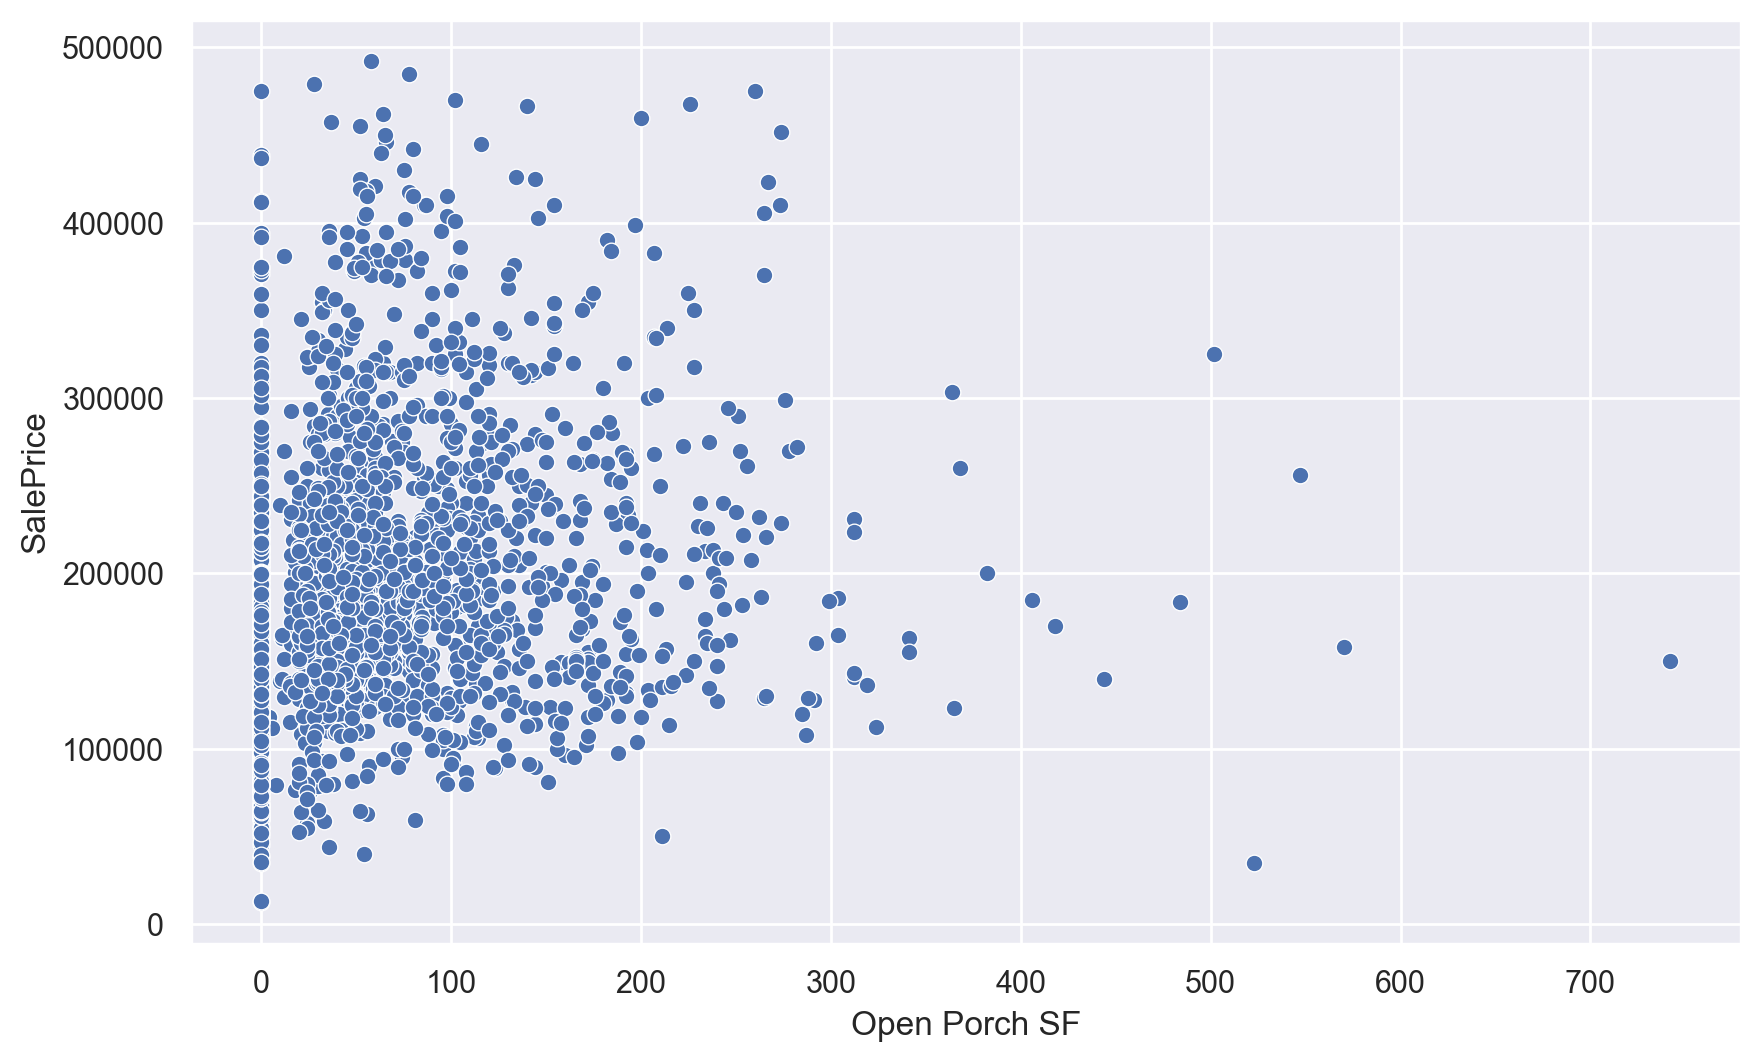

In [76]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=data["Open Porch SF"], y=data["SalePrice"])

### SalePrice

In [53]:
data["SalePrice"].describe()

count      2903.000000
mean     180393.842921
std       79814.696125
min       12789.000000
25%      129100.000000
50%      160000.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

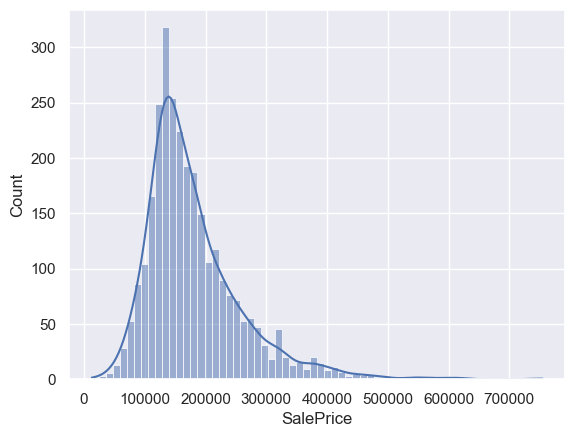

In [54]:
sns.histplot(data["SalePrice"], kde=True)

In [55]:
data=data[data["SalePrice"]<500000]

In [56]:
data.isna().values.any()

False

In [497]:
data.describe()

Lot Frontage       Lot Area  Overall Qual  Overall Cond   Year Built  \
count   2885.000000    2885.000000   2885.000000   2885.000000  2885.000000   
mean      69.042026   10062.686308      6.065858      5.570191  1970.924783   
std       21.249432    7788.389658      1.387667      1.116488    30.202614   
min       21.000000    1300.000000      1.000000      1.000000  1872.000000   
25%       60.000000    7407.000000      5.000000      5.000000  1953.000000   
50%       68.430495    9375.000000      6.000000      5.000000  1972.000000   
75%       79.000000   11457.000000      7.000000      6.000000  2000.000000   
max      313.000000  215245.000000     10.000000      9.000000  2010.000000   

       Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
count     2885.000000   2885.000000   2885.000000   2885.000000  2885.000000   
mean      1983.983362     98.416638    436.900867     49.708146   557.068631   
std         20.861667    171.730074    446.660209    168.195042   437.853849   
min       1950.000000      0.000000      0.000000      0.000000     0.000000   
25%       1965.000000      0.000000      0.000000      0.000000   218.000000   
50%       1992.000000      0.000000    368.000000      0.000000   464.000000   
75%       2003.000000    161.000000    732.000000      0.000000   798.000000   
max       2010.000000   1600.000000   5644.000000   1526.000000  2336.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2885.000000    2885.000000     2885.000000  2885.000000   
mean   ...     93.149740      46.936222       23.158406     2.632929   
std    ...    125.473115      67.047482       64.313042    25.334614   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      26.000000        0.000000     0.000000   
75%    ...    168.000000      69.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2885.000000  2885.000000   2885.000000  2885.000000  2885.000000   
mean      15.794107     2.036049     51.424957     6.215251  2007.792028   
std       55.677400    34.262258    570.710019     2.712107     1.317652   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2885.000000  
mean   177878.315425  
std     73201.491844  
min     12789.000000  
25%    129000.000000  
50%    160000.000000  
75%    212300.000000  
max    492000.000000  

[8 rows x 36 columns]

### Applying Isolation Forest to identify the outliers and exclude them from dataset

In [57]:
data=pd.get_dummies(data, drop_first=True)

In [58]:
data.shape

(2885, 275)

In [59]:
X=data.drop("SalePrice",axis=1)
y=data.SalePrice

In [60]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [61]:
from sklearn.ensemble import IsolationForest

In [82]:
iforest=IsolationForest(n_estimators=500, contamination=0.05)
iforest.fit(scaled_X)

IsolationForest(contamination=0.05, n_estimators=500)

In [83]:
pred=iforest.predict(scaled_X)
Counter(pred)

Counter({1: 2740, -1: 145})

In [84]:
outlier_indices = [i for i, x in enumerate(pred) if x == -1]
len(outlier_indices)

145

In [85]:
clean_data=pd.DataFrame(np.delete(np.array(data), outlier_indices,axis=0),columns=data.columns)

<Axes: xlabel='Open Porch SF', ylabel='SalePrice'>

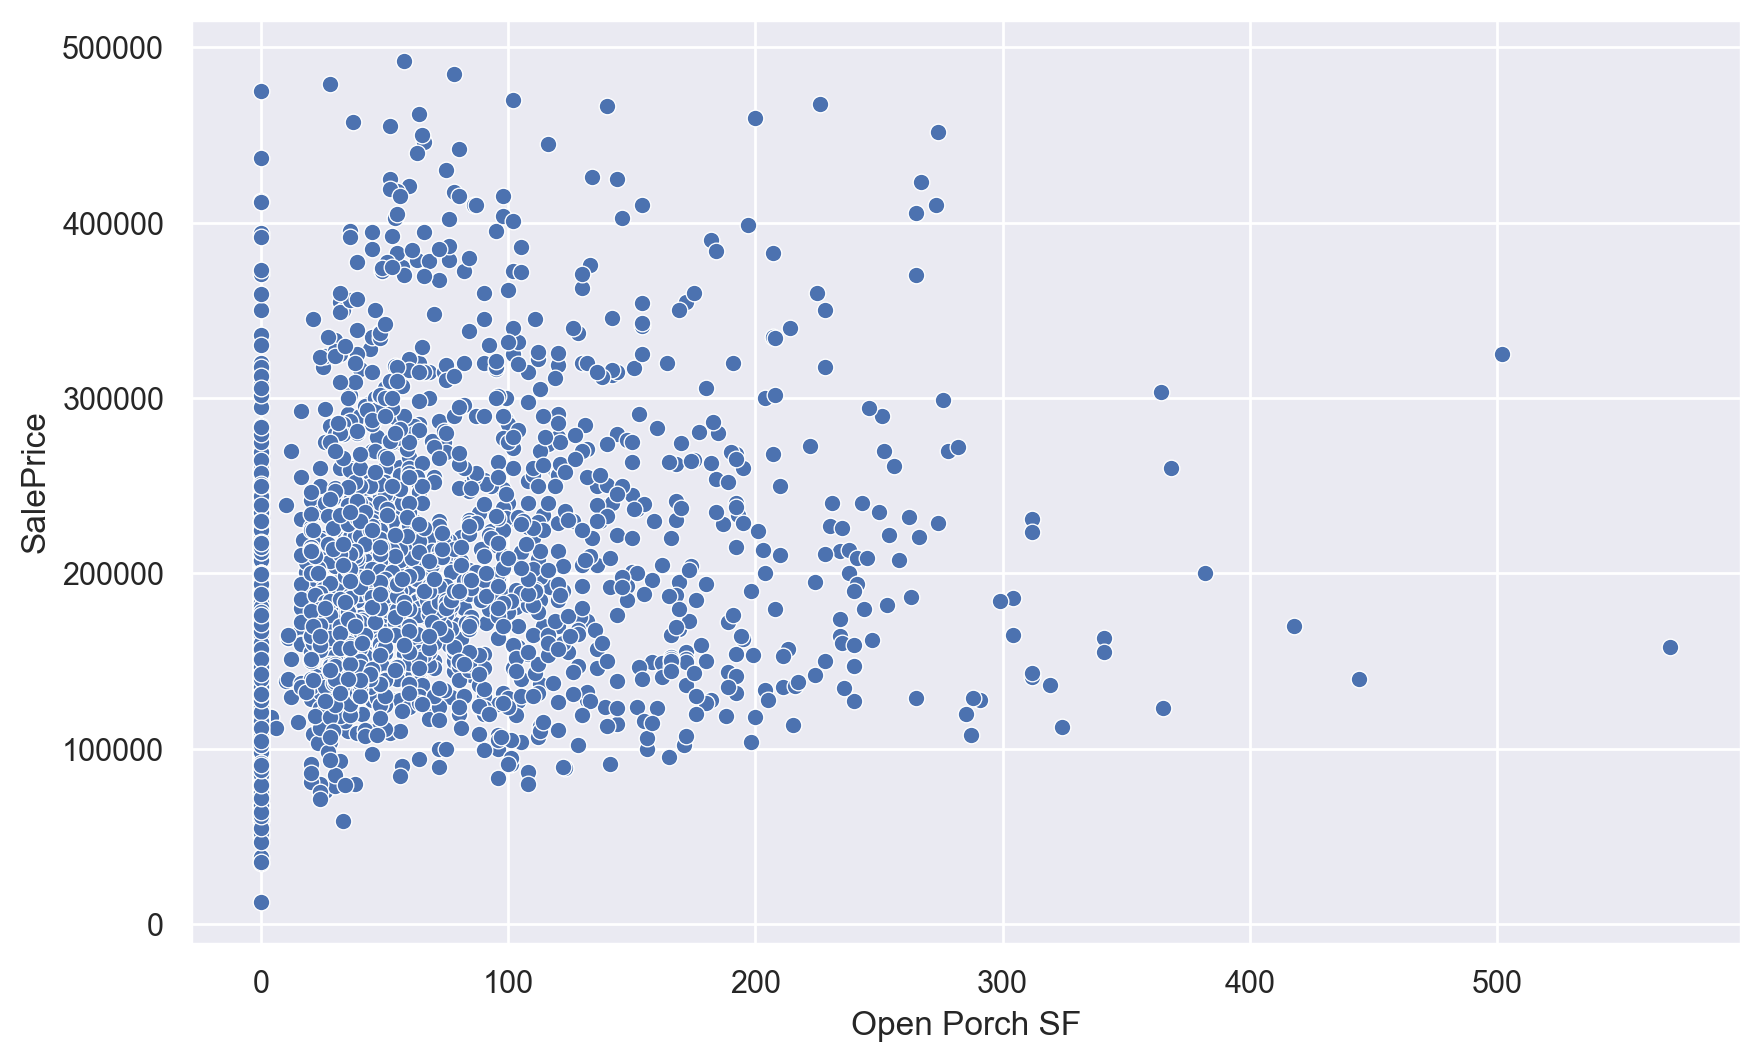

In [86]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=clean_data["Open Porch SF"], y=clean_data["SalePrice"])

In [87]:
data.shape

(2885, 275)

In [88]:
clean_data.shape

(2740, 275)

## Building different models to predict the sale price

In [89]:
x=clean_data.drop("SalePrice",axis=1)
y=clean_data.SalePrice

In [90]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=101)

In [91]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [92]:
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [147]:
def adj_R2(R2,n,k):
    return 1 - (1 - R2) * (n - 1) / (n - k - 1)

In [160]:
def model_evaluation(model, parameters, x_train, y_train,x_test, y_test):
    bayes=BayesSearchCV(model, search_spaces=parameters, cv=5)
    bayes.fit(x_train, y_train)
    train_pred=bayes.predict(x_train)
    train_error=round(np.sqrt(mean_squared_error(y_train, train_pred))/y_train.mean()*100,2)
    train_R2=round(r2_score(y_train, train_pred)*100,2)
    train_adj_R2=round(adj_R2(train_R2/100,x_train.shape[0],x_train.shape[1])*100,2)
    test_pred=bayes.predict(x_test)
    test_error=round(np.sqrt(mean_squared_error(y_test, test_pred))/y_test.mean()*100,2)
    test_R2=round(r2_score(y_test, test_pred)*100,2)
    test_adj_R2=round(adj_R2(test_R2/100,x_test.shape[0],x_test.shape[1])*100,2)
    performace_table=pd.DataFrame()
    performace_table["Performance indicators"]=["Error percentage", "R2", "Adjusted_R2"]
    performace_table["On Training dataset"]=[train_error, train_R2, train_adj_R2]
    performace_table["On Test dataset"]=[test_error, test_R2, test_adj_R2]
    return performace_table

### Regularized Linear model - ElasticNetCV

In [158]:
elastic_model=ElasticNetCV()
elastic_params={"l1_ratio": Real(0.1,1)}

In [159]:
model_evaluation(elastic_model, elastic_params,x_train, y_train,x_test, y_test)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective h

Performance indicators  On Training dataset  On Test dataset
0       Error percentage                 9.42            10.99
1                     R2                94.36            92.61
2            Adjusted_R2                 0.94             0.85

### Support Vector Machine Regressor model

In [99]:
svr_model=SVR(kernel='linear')
svr_params={'C': Real(0.1,100),
            'gamma': Categorical(['auto','scale'])
                }

In [162]:
model_evaluation(svr_model, svr_params,x_train, y_train,x_test, y_test)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective h

Performance indicators  On Training dataset  On Test dataset
0       Error percentage                10.45            11.80
1                     R2                93.07            91.49
2            Adjusted_R2                92.08            82.95

### XGBoost model

In [163]:
xgb_model=xgb.XGBRegressor()
xgb_params={'n_estimators': Integer(50,500),
            'learning_rate': Real(0.01,0.2),
            'max_depth': Integer(3,10),
            'subsample':Real(0.5,1),
            'colsample_bytree': Real(0.5,1),
            'gamma': Real(0.1,10),
            'reg_alpha': Real(0.01,1),
            'reg_lambda': Real(1,50),
            'min_child_weight': Integer(2,10)
            }

In [164]:
model_evaluation(xgb_model, xgb_params,x_train, y_train,x_test, y_test)

Performance indicators  On Training dataset  On Test dataset
0       Error percentage                 6.09            11.01
1                     R2                97.65            92.59
2            Adjusted_R2                97.31            85.15

### Choosing the model that performs better

In [103]:
elastic_model=ElasticNetCV()
elastic_params={"l1_ratio": Real(0.1,1)}

In [104]:
bayes=BayesSearchCV(elastic_model, search_spaces=elastic_params, cv=5)
bayes.fit(x_train, y_train)

c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\Emil.Javadli\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective h

BayesSearchCV(cv=5, estimator=ElasticNetCV(),
              search_spaces={'l1_ratio': Real(low=0.1, high=1, prior='uniform', transform='normalize')})

In [111]:
bayes.best_estimator_

ElasticNetCV(l1_ratio=1.0)

In [173]:
pred=bayes.predict(x_test)
test_error=round(np.sqrt(mean_squared_error(y_test, pred))/y_test.mean()*100,2)
test_R2=round(r2_score(y_test, pred)*100,2)
test_adj_R2=round(adj_R2(test_R2/100, x_test.shape[0], x_test.shape[1])*100,2)
print(f"{test_error}%")
print(f"{test_R2}%")
print(f"{test_adj_R2}%")

10.99%
92.61%
85.19%


<Axes: xlabel='SalePrice'>

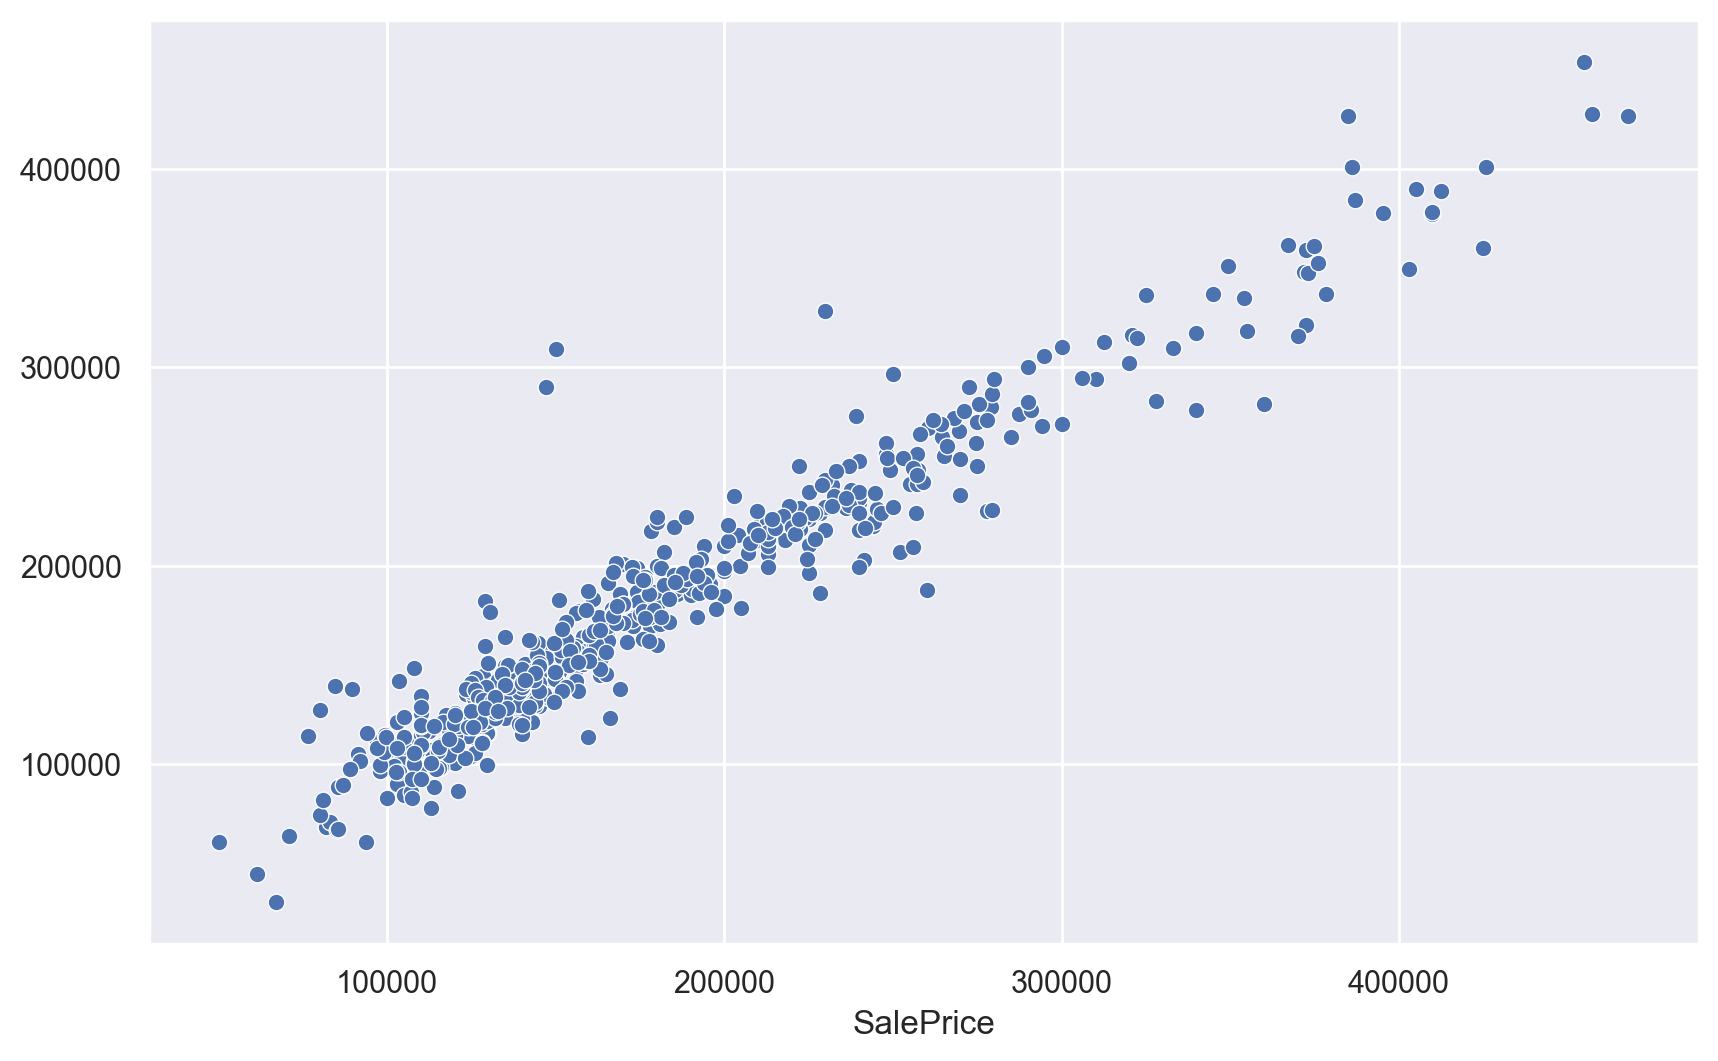

In [112]:
pred=bayes.predict(x_test)
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=y_test, y=pred)

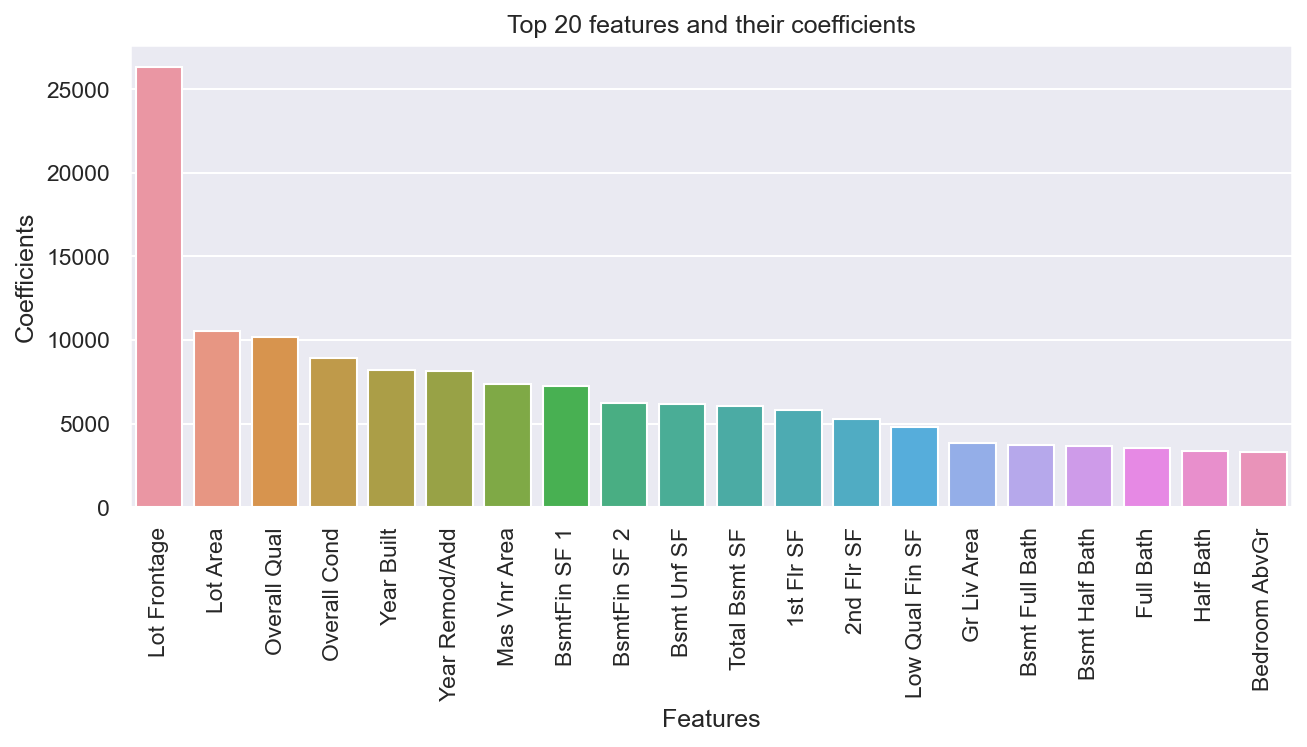

In [166]:
feat=np.abs(pd.DataFrame(bayes.best_estimator_.coef_, columns=["Coefficients"])).sort_values(by='Coefficients', ascending=False)
feat['Features']=x.columns
# feat.head(20)
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(data=feat.head(20), x="Features", y="Coefficients")
plt.xticks(rotation=90);
plt.title("Top 20 features and their coefficients");